In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train  = pd.read_csv('C:/Users/Administrator/Desktop/ML/L&T/train_aox2Jxw/train.csv')
test   = pd.read_csv('C:/Users/Administrator/Desktop/ML/L&T/test_bqCt9Pv.csv')
sample = pd.read_csv('C:/Users/Administrator/Desktop/ML/L&T/sample_submission_24jSKY6.csv')
train.shape, test.shape,sample.shape

((233154, 41), (112392, 40), (112392, 2))

In [3]:
train.head()

UniqueID  disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
0    420825             50578       58400  89.55         67        22807   
1    537409             47145       65550  73.23         67        22807   
2    417566             53278       61360  89.63         67        22807   
3    624493             57513       66113  88.48         67        22807   
4    539055             52378       60300  88.39         67        22807   

   manufacturer_id  Current_pincode_ID Date.of.Birth Employment.Type  \
0               45                1441      01-01-84        Salaried   
1               45                1502      31-07-85   Self employed   
2               45                1497      24-08-85   Self employed   
3               45                1501      30-12-93   Self employed   
4               45                1495      09-12-77   Self employed   

       ...      SEC.SANCTIONED.AMOUNT  SEC.DISBURSED.AMOUNT  \
0      ...                          0                     0   
1      ...                          0                     0   
2      ...                          0                     0   
3      ...                          0                     0   
4      ...                          0                     0   

   PRIMARY.INSTAL.AMT  SEC.INSTAL.AMT  NEW.ACCTS.IN.LAST.SIX.MONTHS  \
0                   0               0                             0   
1                1991               0                             0   
2                   0               0                             0   
3                  31               0                             0   
4                   0               0                             0   

   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  AVERAGE.ACCT.AGE  \
0                                    0         0yrs 0mon   
1                                    1        1yrs 11mon   
2                                    0         0yrs 0mon   
3                                    0         0yrs 8mon   
4                                    0         0yrs 0mon   

   CREDIT.HISTORY.LENGTH  NO.OF_INQUIRIES  loan_default  
0              0yrs 0mon                0             0  
1             1yrs 11mon                0             1  
2              0yrs 0mon                0             0  
3              1yrs 3mon                1             1  
4              0yrs 0mon                1             1  

[5 rows x 41 columns]

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

In [5]:
train.sort_values('UniqueID').tail(10)

UniqueID  disbursed_amount  asset_cost   ltv  branch_id  supplier_id  \
52554     658669             75079      101915 74.57         48        18373   
127735    658670             50078       66945 77.68         61        22817   
37184     658671             68382       78000 89.74        248        23337   
183435    658672             47849       66842 74.80         68        21899   
94172     658673             60997       73000 85.00          2        14834   
84872     658674             39687       61247 66.90         85        17138   
33957     658675             57659       69442 84.96         67        22045   
119855    658676             34484       72592 48.21         48        24124   
230136    671033             68054      109791 63.20        217        24663   
228651    671084             30034       76960 41.58          8        14823   

        manufacturer_id  Current_pincode_ID Date.of.Birth Employment.Type  \
52554                49                6338      10-06-82   Self employed   
127735               86                1347      01-01-88        Salaried   
37184                51                1789      11-03-71        Salaried   
183435               86                 931      23-11-78   Self employed   
94172                86                2378      01-07-75        Salaried   
84872                45                1933      01-01-77        Salaried   
33957                86                1434      23-10-73        Salaried   
119855               51                6370      10-04-96        Salaried   
230136               51                7295      21-06-71   Self employed   
228651               45                5244      25-12-93   Self employed   

       DisbursalDate  State_ID  Employee_code_ID  MobileNo_Avl_Flag  \
52554       31-10-18         5              1246                  1   
127735      31-10-18         6              1203                  1   
37184       31-10-18         4               166                  1   
183435      31-10-18         6              2533                  1   
94172       31-10-18         4              1423                  1   
84872       31-10-18         4               287                  1   
33957       31-10-18         6              1800                  1   
119855      31-10-18         5              1571                  1   
230136      31-10-18         7              3563                  1   
228651      31-10-18         3              3490                  1   

        Aadhar_flag  PAN_flag  VoterID_flag  Driving_flag  Passport_flag  \
52554             1         0             0             0              0   
127735            1         0             0             0              0   
37184             1         0             0             0              0   
183435            1         0             0             0              0   
94172             1         0             0             0              0   
84872             1         0             0             0              0   
33957             1         0             0             0              0   
119855            0         0             1             0              0   
230136            1         0             0             0              0   
228651            1         0             0             0              0   

        PERFORM_CNS.SCORE PERFORM_CNS.SCORE.DESCRIPTION  PRI.NO.OF.ACCTS  \
52554                 714               D-Very Low Risk                1   
127735                  0   No Bureau History Available                0   
37184                   0   No Bureau History Available                0   
183435                573                 I-Medium Risk                5   
94172                   0   No Bureau History Available                0   
84872                   0   No Bureau History Available                0   
33957                 473                   K-High Risk               10   
119855                  0   No Bureau History Availa

In [6]:
test.sort_values('UniqueID').head(10)

UniqueID  disbursed_amount  asset_cost   ltv  branch_id  supplier_id  \
21229     654115             46849       67700 73.86          3        16277   
112       654116             41394       64286 66.89         34        18680   
19289     654117             71123       99175 73.10         20        24312   
2946      654118             76151      103490 77.30         10        23576   
20554     654119             48445       72875 67.65         65        17752   
17844     654120             72817      101500 73.89         19        18757   
26730     654121             34531       63074 58.66         19        24345   
35823     654122             43794       69249 64.98         17        20335   
112354    654123             44094       95422 46.84         34        20700   
47404     654124             59247       71380 85.46         61        22817   

        manufacturer_id  Current_pincode_ID Date.of.Birth Employment.Type  \
21229                45                 571      01-01-83   Self employed   
112                  45                1027      27-12-96   Self employed   
19289                49                6254      03-06-96        Salaried   
2946                 45                5697      01-01-83   Self employed   
20554                51                6814      15-07-87   Self employed   
17844               145                1855      11-03-93   Self employed   
26730                45                1858      11-10-84        Salaried   
35823                86                3283      31-05-86        Salaried   
112354               48                1051      10-04-92        Salaried   
47404                86                1337      21-07-82   Self employed   

       DisbursalDate  State_ID  Employee_code_ID  MobileNo_Avl_Flag  \
21229       03-11-18        15               705                  1   
112         03-11-18         6              1835                  1   
19289       03-11-18         5              1623                  1   
2946        03-11-18         3               238                  1   
20554       03-11-18        13              1783                  1   
17844       03-11-18         4               480                  1   
26730       03-11-18         4              1055                  1   
35823       03-11-18        17              1354                  1   
112354      03-11-18         6              3705                  1   
47404       03-11-18         6               491                  1   

        Aadhar_flag  PAN_flag  VoterID_flag  Driving_flag  Passport_flag  \
21229             1         0             0             0              0   
112               1         0             0             0              0   
19289             1         0             0             0              0   
2946              1         0             0             0              0   
20554             0         1             1             0              0   
17844             1         0             0             0              0   
26730             1         0             0             0              0   
35823             1         0             0             0              0   
112354            0         0             1             0              0   
47404             1         0             0             0              0   

        PERFORM_CNS.SCORE PERFORM_CNS.SCORE.DESCRIPTION  PRI.NO.OF.ACCTS  \
21229                   0   No Bureau History Available                0   
112                     0   No Bureau History Available                0   
19289                   0   No Bureau History Available                0   
2946                    0   No Bureau History Available                0   
20554                   0   No Bureau History Available                0   
17844                 758               C-Very Low Risk                2   
26730                   0   No Bureau History Available                0   
35823                 664                    F-Low R

In [10]:
train.columns = [i.lower() for i in train.columns]
test.columns  = [z.lower() for z in test.columns]

0    182543
1     50611
Name: loan_default, dtype: int64


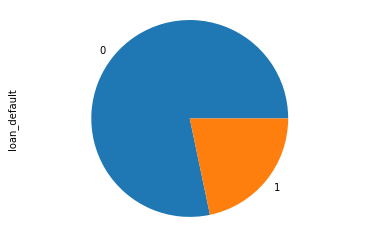

In [16]:
train['loan_default'].value_counts().plot(kind = 'pie')
print(train['loan_default'].value_counts())

plt.axis('equal')
plt.show()

In [18]:
train.nunique()

UniqueID                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
Current_pincode_ID                       6698
Date.of.Birth                           15433
Employment.Type                             2
DisbursalDate                              84
State_ID                                   22
Employee_code_ID                         3270
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS.SCORE                         573
PERFORM_CNS.SCORE.DESCRIPTION              20
PRI.NO.OF.ACCTS                   

In [38]:
defaulters    = train[train['loan_default'] == 1]
not_defaulers = train[train['loan_default'] == 0]
defaulters.shape,not_defaulers.shape

((50611, 41), (182543, 41))

In [43]:
x = train.groupby('loan_default')['disbursed_amount'].mean()
x

loan_default
0   53826.47
1   56270.47
Name: disbursed_amount, dtype: float64

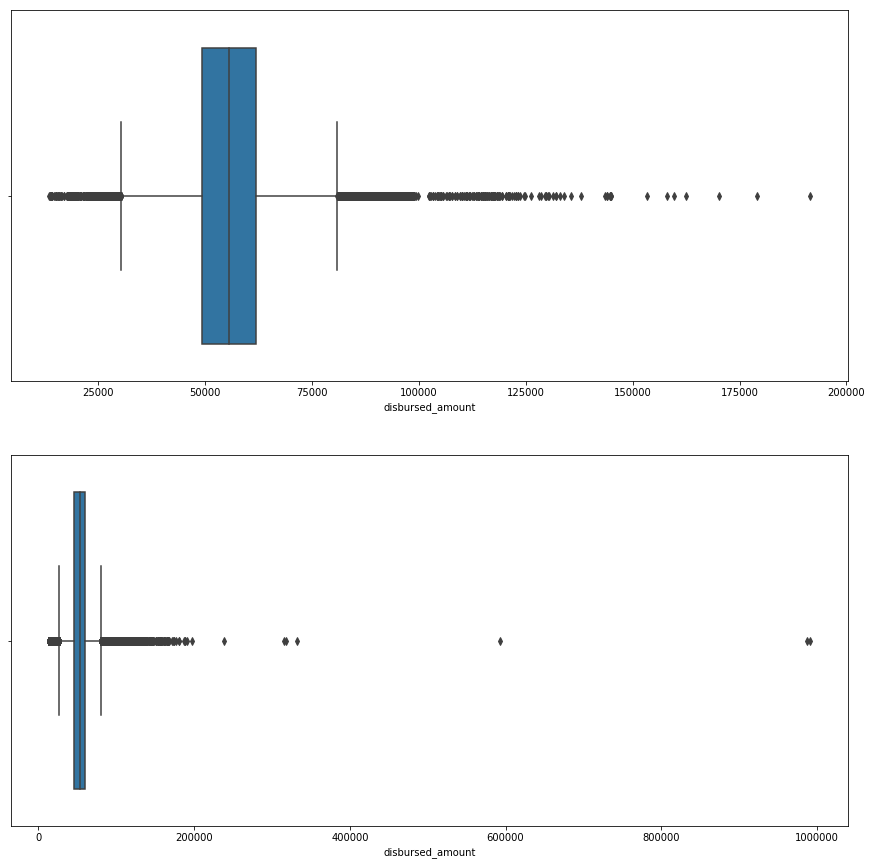

In [47]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.boxplot(defaulters['disbursed_amount'])

plt.subplot(2,1,2)
sns.boxplot(not_defaulers['disbursed_amount'])

plt.show()

In [48]:
defaulters.describe()

UniqueID  disbursed_amount  asset_cost      ltv  branch_id  \
count  50611.00          50611.00    50611.00 50611.00   50611.00   
mean  540309.06          56270.47    76378.18    76.88      76.94   
std    70831.88          12150.26    18680.50    10.33      71.96   
min   417439.00          13369.00    37000.00    15.30       1.00   
25%   477773.00          49303.00    65894.00    72.06      16.00   
50%   544405.00          55459.00    71326.00    79.06      64.00   
75%   604090.50          61947.00    80061.50    84.68     135.00   
max   658671.00         191392.00   281164.00    95.00     261.00   

       supplier_id  manufacturer_id  Current_pincode_ID  State_ID  \
count     50611.00         50611.00            50611.00  50611.00   
mean      19820.06            67.98             3517.68      7.67   
std        3452.02            22.26             2246.72      4.56   
min       10524.00            45.00                1.00      1.00   
25%       16680.00            45.00             1595.00      4.00   
50%       20597.00            51.00             2995.00      6.00   
75%       23108.00            86.00             5823.00     12.00   
max       24803.00           153.00             7343.00     22.00   

       Employee_code_ID  MobileNo_Avl_Flag  Aadhar_flag  PAN_flag  \
count          50611.00           50611.00     50611.00  50611.00   
mean            1587.74               1.00         0.81      0.08   
std              979.69               0.00         0.39      0.27   
min                1.00               1.00         0.00      0.00   
25%              738.00               1.00         1.00      0.00   
50%             1512.00               1.00         1.00      0.00   
75%             2414.00               1.00         1.00      0.00   
max             3795.00               1.00         1.00      1.00   

       VoterID_flag  Driving_flag  Passport_flag  PERFORM_CNS.SCORE  \
count      50611.00      50611.00       50611.00           50611.00   
mean           0.17          0.02           0.00             252.24   
std            0.38          0.15           0.04             318.83   
min            0.00          0.00           0.00               0.00   
25%            0.00          0.00           0.00               0.00   
50%            0.00          0.00           0.00               0.00   
75%            0.00          0.00           0.00             610.00   
max            1.00          1.00           1.00             879.00   

       PRI.NO.OF.ACCTS  PRI.ACTIVE.ACCTS  PRI.OVERDUE.ACCTS  \
count         50611.00          50611.00           50611.00   
mean              2.09              0.89               0.20   
std               5.04              1.67               0.60   
min               0.00              0.00               0.00   
25%               0.00              0.00               0.00   
50%               0.00              0.00               0.00   
75%               2.00              1.00               0.00   
max             453.00             35.00              18.00   

       PRI.CURRENT.BALANCE  PRI.SANCTIONED.AMOUNT  PRI.DISBURSED.AMOUNT  \
count             50611.00               50611.00              50611.00   
mean             116892.88              167519.60             167691.12   
std              720451.28             4525738.06            4527095.23   
min            -2018309.00                   0.00                  0.00   
25%                   0.00                   0.00                  0.00   
50%                   0.00                   0.00                  0.00   
75%               25690.00               50000.00              50000.00   
max            45051160.00          1000000000.00         1000000000.00   

       SEC.NO.OF.ACCTS  SEC.ACTIVE.ACCTS  SEC.OVERDUE.ACCTS  \
count         50611.00          50611.00           50611.00   
mean              0.05              0.02               0.01   
std               0.53              0.29               0.11   
min  

In [49]:
not_defaulers.describe()

UniqueID  disbursed_amount  asset_cost       ltv  branch_id  \
count 182543.00         182543.00   182543.00 182543.00  182543.00   
mean  534700.01          53826.47    75722.81     74.15      71.83   
std    67551.16          13140.70    19015.00     11.68      69.19   
min   417428.00          13320.00    37000.00     10.03       1.00   
25%   476510.00          46369.00    65680.00     68.02      13.00   
50%   533986.00          53303.00    70845.00     76.00      61.00   
75%   592566.50          59947.00    78999.00     83.16     121.00   
max   671084.00         990572.00  1628992.00     95.00     261.00   

       supplier_id  manufacturer_id  Current_pincode_ID  State_ID  \
count    182543.00        182543.00           182543.00 182543.00   
mean      19588.33            69.32             3363.39      7.15   
std        3501.28            22.10             2234.61      4.45   
min       10524.00            45.00                1.00      1.00   
25%       16445.00            48.00             1509.00      4.00   
50%       20289.00            86.00             2958.00      6.00   
75%       22995.00            86.00             5638.00      9.00   
max       24803.00           156.00             7345.00     22.00   

       Employee_code_ID  MobileNo_Avl_Flag  Aadhar_flag  PAN_flag  \
count         182543.00          182543.00    182543.00 182543.00   
mean            1538.87               1.00         0.85      0.08   
std              973.77               0.00         0.36      0.26   
min                1.00               1.00         0.00      0.00   
25%              704.00               1.00         1.00      0.00   
50%             1436.00               1.00         1.00      0.00   
75%             2345.00               1.00         1.00      0.00   
max             3794.00               1.00         1.00      1.00   

       VoterID_flag  Driving_flag  Passport_flag  PERFORM_CNS.SCORE  \
count     182543.00     182543.00      182543.00          182543.00   
mean           0.14          0.02           0.00             299.78   
std            0.34          0.15           0.05             342.88   
min            0.00          0.00           0.00               0.00   
25%            0.00          0.00           0.00               0.00   
50%            0.00          0.00           0.00              15.00   
75%            0.00          0.00           0.00             690.00   
max            1.00          1.00           1.00             890.00   

       PRI.NO.OF.ACCTS  PRI.ACTIVE.ACCTS  PRI.OVERDUE.ACCTS  \
count        182543.00         182543.00          182543.00   
mean              2.54              1.08               0.14   
std               5.26              2.01               0.53   
min               0.00              0.00               0.00   
25%               0.00              0.00               0.00   
50%               1.00              0.00               0.00   
75%               3.00              1.00               0.00   
max             354.00            144.00              25.00   

       PRI.CURRENT.BALANCE  PRI.SANCTIONED.AMOUNT  PRI.DISBURSED.AMOUNT  \
count            182543.00              182543.00             182543.00   
mean             179487.58              232639.50             232032.57   
std              994631.74             1234346.75            1240214.83   
min            -6678296.00                   0.00                  0.00   
25%                   0.00                   0.00                  0.00   
50%                   0.00                   0.00                  0.00   
75%               38161.50               69100.00              66740.50   
max            96524920.00           105865712.00          105755712.00   

       SEC.NO.OF.ACCTS  SEC.ACTIVE.ACCTS  SEC.OVERDUE.ACCTS  \
count        182543.00         182543.00          182543.00   
mean              0.06              0.03               0.01   
std               0.65              0.32               0.11

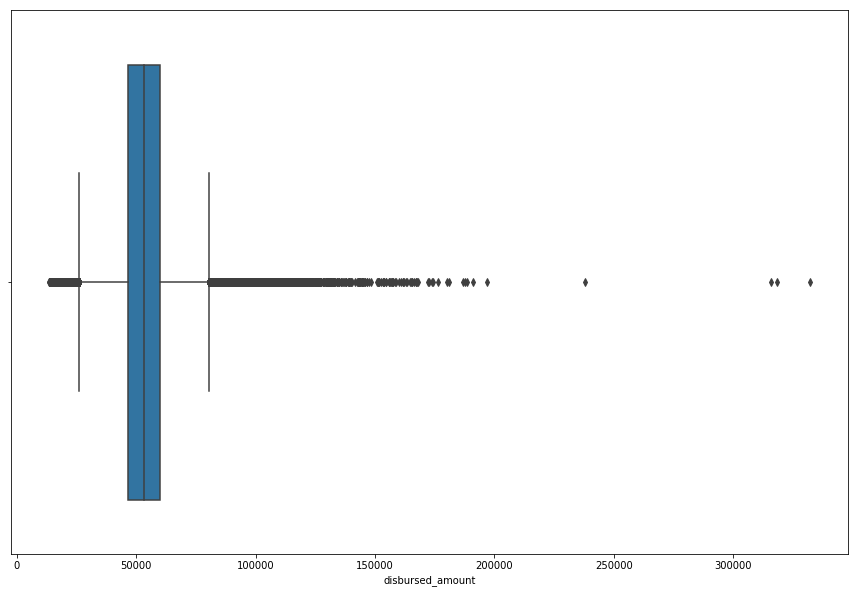

In [59]:
plt.figure(figsize=(15,10))
x = not_defaulers[not_defaulers['disbursed_amount'] <= 500000]
sns.boxplot(x['disbursed_amount'])
plt.show()

In [259]:
master_sheet  = train.copy()
master_test   = test.copy()
#master_sheet.head(5)

In [260]:
master_sheet['rat_dis_asset'] = master_sheet['disbursed_amount'] / master_sheet['asset_cost'] * 100
master_test['rat_dis_asset']  = master_test['disbursed_amount'] / master_test['asset_cost'] * 100

master_sheet['rat_dis_asset'].head(10)


0   86.61
1   71.92
2   86.83
3   86.99
4   86.86
5   88.07
6   75.36
7   70.91
8   86.67
9   85.81
Name: rat_dis_asset, dtype: float64

In [13]:
master_sheet['branch_id'].unique()

array([ 67,  78,  34, 130,  74,  11,   5,  20,  63,  48,  79,   3,  42,
       142,  36,  16, 146, 147,  65,   9,   1, 152,  29,  10,  70,  19,
         7,  85,  61,  17,   8, 153,  18, 162,  68,  72,  64,   2, 160,
       251, 103, 104, 120, 136,  77,  13, 138, 135,  73, 248,  15, 165,
        62,  76, 105, 249, 250, 255, 254,  82, 158, 159, 117, 202, 259,
       207,  35,  69,  97,  43, 257, 258, 260, 111,  66, 261, 101,  14,
       121, 217,  84, 100], dtype=int64)

In [14]:
x = pd.DataFrame(master_sheet.groupby(['branch_id','loan_default']).size().reset_index())

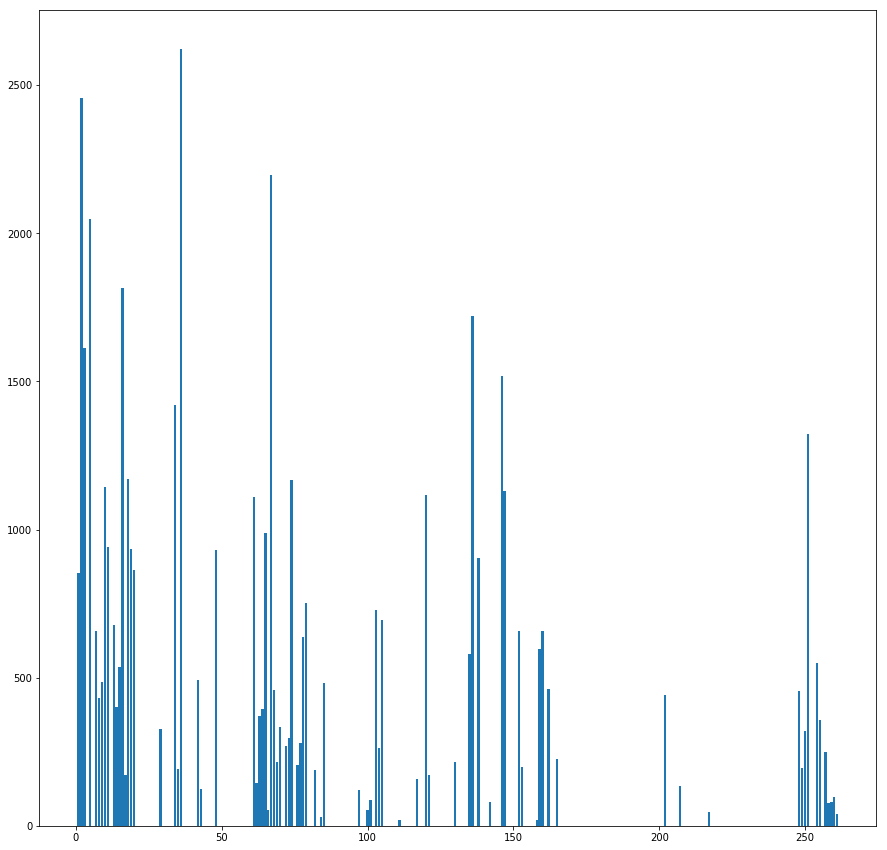

In [15]:
plt.figure(figsize=(15,15))
plt.bar(x[x['loan_default'] == 1]['branch_id'],
       x[x['loan_default'] == 1][0])
plt.show()
#so branch does make a lot of difference. With so many labels. We can try label encoding later.

In [261]:
print(master_sheet['supplier_id'].nunique())
x = pd.DataFrame(master_sheet.groupby('supplier_id')['loan_default'].sum()/master_sheet.groupby('supplier_id').size()).reset_index()
x.rename(columns={0 : 'supp_encode'}, inplace=True)
x.head()
master_sheet = pd.merge(master_sheet,x, on = 'supplier_id', how = 'left')
#master_sheet.head()

2953


In [262]:
master_test = pd.merge(master_test,x, on = 'supplier_id', how = 'left')
master_test.head()

uniqueid  disbursed_amount  asset_cost   ltv  branch_id  supplier_id  \
0    655269             53478       63558 86.54         67        22807   
1    723482             55513       63163 89.45         67        22807   
2    758529             65282       84320 79.93         78        23135   
3    763449             46905       63896 76.58         78        17014   
4    708663             51428       63896 86.08         78        17014   

   manufacturer_id  current_pincode_id date.of.birth employment.type  \
0               45                1497      01-01-74        Salaried   
1               45                1497      20-05-85   Self employed   
2               86                2071      14-10-95        Salaried   
3               45                2070      01-06-73   Self employed   
4               45                2069      01-06-72        Salaried   

  disbursaldate  state_id  employee_code_id  mobileno_avl_flag  aadhar_flag  \
0      03-11-18         6              1998                  1            1   
1      20-11-18         6              1998                  1            1   
2      29-11-18         4              1646                  1            1   
3      29-11-18         4              1646                  1            1   
4      17-11-18         4              1646                  1            1   

   pan_flag  voterid_flag  driving_flag  passport_flag  perform_cns.score  \
0         0             0             0              0                  0   
1         0             0             0              0                749   
2         1             0             0              0                  0   
3         0             0             0              0                 14   
4         0             0             0              0                  0   

  perform_cns.score.description  pri.no.of.accts  pri.active.accts  \
0   No Bureau History Available                0                 0   
1               C-Very Low Risk                2                 1   
2   No Bureau History Available                0                 0   
3  Not Scored: Only a Guarantor                1                 1   
4   No Bureau History Available                0                 0   

   pri.overdue.accts  pri.current.balance  pri.sanctioned.amount  \
0                  0                    0                      0   
1                  0                43898                  48780   
2                  0                    0                      0   
3                  1               132480                 255000   
4                  0                    0                      0   

   pri.disbursed.amount  sec.no.of.accts  sec.active.accts  sec.overdue.accts  \
0                     0                0                 0                  0   
1                 48780                0                 0                  0   
2                     0                0                 0                  0   
3                255000                0                 0                  0   
4                     0                0                 0                  0   

   sec.current.balance  sec.sanctioned.amount  sec.disbursed.amount  \
0                    0                      0                     0   
1                    0                      0                     0   
2                    0                      0                     0   
3                    0                      0                     0   
4                    0                      0                     0   

   primary.instal.amt  sec.instal.amt  new.accts.in.last.six.months  \
0                   0               0                             0   
1                5605               0                             1   
2                   0               0                             0   
3                   0               0                             0   
4                   0               0                             0   

   delinqu

In [263]:
master_sheet.shape, master_test.shape

((233154, 43), (112392, 42))

In [110]:
master_sheet['manufacturer_id'].unique()
#lets keep it this way.

array([ 45,  86,  48,  51, 120,  49, 145,  67, 153, 156, 152], dtype=int64)

In [115]:
master_sheet.sort_values('supplier_id')[['supplier_id','current_pincode_id','loan_default']].head(1050)
#CANT SPECIFIY A RELATIONSHIP BETWEEN TWO RIGHT NOW.LETS SEE IT LATER.

supplier_id  current_pincode_id  loan_default
64563         10524                5425             0
79948         10524                5417             0
106031        10524                5422             0
47162         10524                5417             1
106009        10524                5425             1
106012        10524                5368             1
4783          12311                5368             0
4753          12311                5422             0
4727          12311                5426             0
150850        12312                5171             0
150848        12312                5073             0
150847        12312                5073             0
150846        12312                5171             0
150845        12312                5221             0
150844        12312                5073             0
150842        12312                5073             0
150839        12312                5073             0
150851        12312                5073             0
150897        12312                5073             0
150838        12312                5103             0
150836        12312                5073             1
150898        12312                5171             0
150899        12312                5216             1
150900        12312                5103             1
150903        12312                5103             0
150841        12312                5073             0
150853        12312                5077             0
150895        12312                5073             0
150896        12312                5073             0
150886        12312                5081             0
150885        12312                5073             0
150879        12312                5064             0
150877        12312                5073             0
150875        12312                5107             0
150874        12312                5107             1
150873        12312                5073             0
150870        12312                5073             0
150868        12312                5073             0
150865        12312                5107             0
150864        12312                5103             0
150863        12312                5157             0
150861        12312                5103             0
150860        12312                5073             0
150858        12312                5073             1
150905        12312                5098             0
150856        12312                5107             0
150854        12312                5109             0
150907        12312                5073             0
150891        12312                5216             0
150908        12312                5103             0
150888        12312                5073             0
150913        12312                5216             0
150912        12312                5073             0
150911        12312                5125             0
150909        12312                5073             0
79725         12374                5150             0
79708         12374                5146             0
79701         12374                5149             0
79700         12374                5145             0
34152         12374                5148             0
34274         12374                5127             0
30965         12374                5117             0
199080        12374                5170             0
79744         12374                5146             0
6276          12374                5200             1
6247          12374                5200             1
6237          12374                5136             1
6071          12374                5108             1
111984        12374                5173             0
79794         12374                5150             0
79806         12374                5150             0
79810         12374                5143             0
30967         12374                5219             0
30968       

In [264]:
master_sheet['date.of.birth'] = pd.to_datetime(master_sheet['date.of.birth'])
master_sheet['year'] = master_sheet['date.of.birth'].dt.year
master_sheet['age']  = 2019 - master_sheet['year'] 


master_test['date.of.birth'] = pd.to_datetime(master_test['date.of.birth'])
master_test['year'] = master_test['date.of.birth'].dt.year
master_test['age']  = 2019 - master_test['year'] 

master_sheet.head()

uniqueid  disbursed_amount  asset_cost   ltv  branch_id  supplier_id  \
0    420825             50578       58400 89.55         67        22807   
1    537409             47145       65550 73.23         67        22807   
2    417566             53278       61360 89.63         67        22807   
3    624493             57513       66113 88.48         67        22807   
4    539055             52378       60300 88.39         67        22807   

   manufacturer_id  current_pincode_id date.of.birth employment.type  \
0               45                1441    1984-01-01        Salaried   
1               45                1502    1985-07-31   Self employed   
2               45                1497    1985-08-24   Self employed   
3               45                1501    1993-12-30   Self employed   
4               45                1495    1977-09-12   Self employed   

  disbursaldate  state_id  employee_code_id  mobileno_avl_flag  aadhar_flag  \
0      03-08-18         6              1998                  1            1   
1      26-09-18         6              1998                  1            1   
2      01-08-18         6              1998                  1            1   
3      26-10-18         6              1998                  1            1   
4      26-09-18         6              1998                  1            1   

   pan_flag  voterid_flag  driving_flag  passport_flag  perform_cns.score  \
0         0             0             0              0                  0   
1         0             0             0              0                598   
2         0             0             0              0                  0   
3         0             0             0              0                305   
4         0             0             0              0                  0   

  perform_cns.score.description  pri.no.of.accts  pri.active.accts  \
0   No Bureau History Available                0                 0   
1                 I-Medium Risk                1                 1   
2   No Bureau History Available                0                 0   
3              L-Very High Risk                3                 0   
4   No Bureau History Available                0                 0   

   pri.overdue.accts  pri.current.balance  pri.sanctioned.amount  \
0                  0                    0                      0   
1                  1                27600                  50200   
2                  0                    0                      0   
3                  0                    0                      0   
4                  0                    0                      0   

   pri.disbursed.amount  sec.no.of.accts  sec.active.accts  sec.overdue.accts  \
0                     0                0                 0                  0   
1                 50200                0                 0                  0   
2                     0                0                 0                  0   
3                     0                0                 0                  0   
4                     0                0                 0                  0   

   sec.current.balance  sec.sanctioned.amount  sec.disbursed.amount  \
0                    0                      0                     0   
1                    0                      0                     0   
2                    0                      0                     0   
3                    0                      0                     0   
4                    0                      0                     0   

   primary.instal.amt  sec.instal.amt  new.accts.in.last.six.months  \
0                   0               0                             0   
1                1991               0                             0   
2                   0               0                             0   
3                  31               0                             0   
4                   0               0                             0   

   delinqu

In [128]:
print(master_sheet['employment.type'].unique())
master_sheet['employment.type'].value_counts()

['Salaried' 'Self employed' nan]


Self employed    127635
Salaried          97858
Name: employment.type, dtype: int64

In [131]:
#lets check nan people

x = master_sheet[pd.isnull(master_sheet['employment.type'])]

In [138]:
master_sheet.dtypes

uniqueid                                        int64
disbursed_amount                                int64
asset_cost                                      int64
ltv                                           float64
branch_id                                       int64
supplier_id                                     int64
manufacturer_id                                 int64
current_pincode_id                              int64
date.of.birth                          datetime64[ns]
employment.type                                object
disbursaldate                                  object
state_id                                        int64
employee_code_id                                int64
mobileno_avl_flag                               int64
aadhar_flag                                     int64
pan_flag                                        int64
voterid_flag                                    int64
driving_flag                                    int64
passport_flag               

In [265]:
master_sheet_impute  = master_sheet[~pd.isnull(master_sheet['employment.type'])].drop(['employment.type','date.of.birth','disbursaldate','average.acct.age','credit.history.length','perform_cns.score.description'], axis = 1)
test_x_impute        = master_sheet[pd.isnull(master_sheet['employment.type'])].drop(['employment.type','date.of.birth','disbursaldate','average.acct.age','credit.history.length','perform_cns.score.description'], axis = 1)
print(master_sheet_impute.shape)
print(test_x_impute.shape)


train_knn_dummy  = pd.get_dummies(master_sheet_impute)
test_knn_dummy   = pd.get_dummies(test_x_impute)
print(train_knn_dummy.shape, test_knn_dummy.shape)

#making train_y
train_y_knn       = master_sheet.loc[master_sheet_impute.index,'employment.type']


from sklearn.preprocessing import StandardScaler
scaler_impute = StandardScaler()
scaler_impute.fit(train_knn_dummy)
master_sheet_impute_scaled = scaler_impute.transform(train_knn_dummy)
test_x_impute_scaled = scaler_impute.transform(test_knn_dummy)

from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=11)
model_knn.fit(master_sheet_impute_scaled, train_y_knn)
model_knn = model_knn.predict(test_x_impute_scaled)

#putting into original data
master_sheet.loc[test_x_impute.index, 'employment.type'] = model_knn

(225493, 39)
(7661, 39)
(225493, 39) (7661, 39)


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [267]:
master_sheet_impute  = master_test[~pd.isnull(master_test['employment.type'])].drop(['employment.type','date.of.birth','disbursaldate','average.acct.age','credit.history.length','perform_cns.score.description','supp_encode'], axis = 1)
test_x_impute        = master_test[pd.isnull(master_test['employment.type'])].drop(['employment.type','date.of.birth','disbursaldate','average.acct.age','credit.history.length','perform_cns.score.description','supp_encode'], axis = 1)
print(master_sheet_impute.shape)
print(test_x_impute.shape)


train_knn_dummy  = pd.get_dummies(master_sheet_impute)
test_knn_dummy   = pd.get_dummies(test_x_impute)
print(train_knn_dummy.shape, test_knn_dummy.shape)

#making train_y
train_y_knn       = master_sheet.loc[master_sheet_impute.index,'employment.type']


from sklearn.preprocessing import StandardScaler
scaler_impute = StandardScaler()
scaler_impute.fit(train_knn_dummy)
master_sheet_impute_scaled = scaler_impute.transform(train_knn_dummy)
test_x_impute_scaled = scaler_impute.transform(test_knn_dummy)

from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=11)
model_knn.fit(master_sheet_impute_scaled, train_y_knn)
model_knn = model_knn.predict(test_x_impute_scaled)

#putting into original data
master_test.loc[test_x_impute.index, 'employment.type'] = model_knn

(108949, 37)
(3443, 37)
(108949, 37) (3443, 37)


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [152]:
x = master_sheet.groupby('state_id')['loan_default'].sum()/master_sheet.groupby('state_id').size()
x.head(30)
#acceptable

state_id
1    0.18
2    0.27
3    0.19
4    0.21
5    0.20
6    0.21
7    0.20
8    0.23
9    0.22
10   0.18
11   0.20
12   0.27
13   0.31
14   0.28
15   0.21
16   0.18
17   0.25
18   0.22
19   0.18
20   0.17
21   0.20
22   0.12
dtype: float64

In [266]:
master_test.isnull().sum()

uniqueid                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
current_pincode_id                        0
date.of.birth                             0
employment.type                        3443
disbursaldate                             0
state_id                                  0
employee_code_id                          0
mobileno_avl_flag                         0
aadhar_flag                               0
pan_flag                                  0
voterid_flag                              0
driving_flag                              0
passport_flag                             0
perform_cns.score                         0
perform_cns.score.description             0
pri.no.of.accts                           0
pri.active.accts                

In [164]:
print('mobile {} ' .format(master_sheet.mobileno_avl_flag.value_counts()))
print('adhar {} ' .format(master_sheet.aadhar_flag.value_counts()/master_sheet.shape[0]))
print('pan {} ' .format(master_sheet.pan_flag.value_counts()/master_sheet.shape[0]))
print('voter {} ' .format(master_sheet.voterid_flag.value_counts()/master_sheet.shape[0]))
print('driving {} ' .format(master_sheet.driving_flag.value_counts()/master_sheet.shape[0]))
print('passport {} ' .format(master_sheet.passport_flag.value_counts()/master_sheet.shape[0]))

mobile 1    233154
Name: mobileno_avl_flag, dtype: int64 
adhar 1   0.84
0   0.16
Name: aadhar_flag, dtype: float64 
pan 0   0.92
1   0.08
Name: pan_flag, dtype: float64 
voter 0   0.86
1   0.14
Name: voterid_flag, dtype: float64 
driving 0   0.98
1   0.02
Name: driving_flag, dtype: float64 
passport 0   1.00
1   0.00
Name: passport_flag, dtype: float64 


In [165]:
print('mobile {} ' .format(test.mobileno_avl_flag.value_counts()))
print('adhar {} ' .format(test.aadhar_flag.value_counts()/test.shape[0]))
print('pan {} ' .format(test.pan_flag.value_counts()/test.shape[0]))
print('voter {} ' .format(test.voterid_flag.value_counts()/test.shape[0]))
print('driving {} ' .format(test.driving_flag.value_counts()/test.shape[0]))
print('passport {} ' .format(test.passport_flag.value_counts()/test.shape[0]))

mobile 1    112392
Name: mobileno_avl_flag, dtype: int64 
adhar 1   0.87
0   0.13
Name: aadhar_flag, dtype: float64 
pan 0   0.81
1   0.19
Name: pan_flag, dtype: float64 
voter 0   0.88
1   0.12
Name: voterid_flag, dtype: float64 
driving 0   0.98
1   0.02
Name: driving_flag, dtype: float64 
passport 0   1.00
1   0.00
Name: passport_flag, dtype: float64 


In [268]:
master_sheet['doc_submitted'] = master_sheet['aadhar_flag'] + master_sheet['pan_flag'] + master_sheet['driving_flag']
master_test['doc_submitted'] = master_test['aadhar_flag'] + master_test['pan_flag'] + master_test['driving_flag']

master_sheet.doc_submitted.value_counts()

1    196148
0     25625
2     11327
3        54
Name: doc_submitted, dtype: int64

In [171]:
print(master_sheet['perform_cns.score'].describe())
master_sheet['perform_cns.score'].value_counts()

count   233154.00
mean       289.46
std        338.37
min          0.00
25%          0.00
50%          0.00
75%        678.00
max        890.00
Name: perform_cns.score, dtype: float64


0      116950
300      8776
738      8662
825      7393
15       3765
17       3672
763      3026
16       2885
708      2104
737      1989
836      1927
18       1534
749      1406
710      1245
680      1075
832      1049
726      1042
681      1031
706       985
14        976
774       922
615       893
758       815
783       807
657       760
719       667
679       661
709       658
771       643
694       542
653       527
845       522
707       521
753       509
728       505
830       484
597       462
640       444
743       419
785       415
762       412
651       395
585       392
819       386
599       385
627       378
721       376
792       370
810       364
654       362
624       359
818       355
572       355
723       348
630       347
659       346
824       344
667       334
643       329
670       311
740       310
705       303
626       301
646       297
684       293
625       290
637       284
691       283
648       282
571       281
623       273
652   

In [172]:
master_sheet['perform_cns.score.description'].value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

In [182]:
print(master_sheet[master_sheet['perform_cns.score.description'] == 'Not Scored: Sufficient History Not Available' ]['loan_default'].value_counts()/master_sheet[master_sheet['perform_cns.score.description'] == 'Not Scored: Sufficient History Not Available' ].shape[0])
print(master_sheet[master_sheet['perform_cns.score.description'] == 'No Bureau History Available' ]['loan_default'].value_counts()/master_sheet[master_sheet['perform_cns.score.description'] == 'No Bureau History Available' ].shape[0])

0   0.74
1   0.26
Name: loan_default, dtype: float64
0   0.77
1   0.23
Name: loan_default, dtype: float64


In [191]:
master_sheet[master_sheet['perform_cns.score.description'] == 'I-Medium Risk' ]['loan_default'].value_counts()/master_sheet[master_sheet['perform_cns.score.description'] == 'I-Medium Risk' ].shape[0]

0   0.73
1   0.27
Name: loan_default, dtype: float64

In [193]:
master_sheet[master_sheet['perform_cns.score.description'] == 'H-Medium Risk' ]['loan_default'].value_counts()/master_sheet[master_sheet['perform_cns.score.description'] == 'H-Medium Risk' ].shape[0]
#lets give it a shot later

0   0.76
1   0.24
Name: loan_default, dtype: float64

In [194]:
master_sheet.head(200)

uniqueid  disbursed_amount  asset_cost   ltv  branch_id  supplier_id  \
0      420825             50578       58400 89.55         67        22807   
1      537409             47145       65550 73.23         67        22807   
2      417566             53278       61360 89.63         67        22807   
3      624493             57513       66113 88.48         67        22807   
4      539055             52378       60300 88.39         67        22807   
5      518279             54513       61900 89.66         67        22807   
6      529269             46349       61500 76.42         67        22807   
7      510278             43894       61900 71.89         67        22807   
8      490213             53713       61973 89.56         67        22807   
9      510980             52603       61300 86.95         67        22807   
10     548567             53278       61230 89.83         67        22807   
11     486821             64769       74190 89.23         67        22807   
12     478647             53278       61330 89.68         67        22807   
13     479533             49478       57010 89.46         67        22807   
14     483869             49278       57080 89.35         67        22807   
15     600655             47549       61400 79.80         67        22807   
16     513916             57713       65750 89.28         67        22807   
17     522020             53503       62100 87.28         67        22807   
18     492995             70017       86760 82.99         67        22807   
19     568857             58259       68500 86.13         67        22807   
20     590630             58013       69650 84.71         67        22807   
21     467015             31184       57110 56.91         67        22807   
22     563215             43594       78256 57.50         67        22744   
23     513139             54513       61900 89.66         67        22807   
24     498082             73123       92900 79.66         67        22807   
25     586411             55213       68600 83.09         67        22807   
26     440293             53713       61780 89.83         67        22807   
27     566763             57713       68040 86.27         67        22807   
28     605314             57513       65750 88.97         67        22807   
29     519075             54513       61900 89.66         67        22807   
30     551137             45349       60300 76.29         67        22807   
31     525983             46549       69518 69.05         67        22744   
32     501823             57259       70100 82.74         67        22807   
33     451537             42594       60630 72.57         67        22807   
34     439084             50678       58300 89.88         67        22807   
35     584660             53078       64280 84.01         67        22807   
36     606338             56013       63930 89.16         67        22807   
37     641415             58013       65838 89.61         67        22807   
38     590213             55759       63100 89.54         67        22807   
39     422926             50578       58400 89.55         67        22807   
40     557071             51303       66450 78.25         67        22807   
41     582949             40894       61230 67.78         67        22807   
42     596436             42894       70600 61.61         67        22807   
43     507978             64282       74290 89.11         67        22807   
44     529381             57213       64750 89.88         67        22807   
45     480958             68082       79806 87.71         67        22744   
46     566809             48349       67650 72.43         67        22807   
47     585779             61013       68850 89.76         67        22807   
48     559601             54078       70000 78.57         67        22807   
49     612741             57613       68950 84.99         67        22807   
50     518864             58413       66100 89.86         67        22807   
5

In [269]:
master_sheet['paid_loans']          = master_sheet['pri.no.of.accts'] - master_sheet['pri.active.accts']
master_sheet['rat_def_to_tot_acc']  = master_sheet['pri.overdue.accts'] / master_sheet['pri.no.of.accts']
master_sheet['rat_def_to_tot_acc'].fillna(0,inplace = True)
master_sheet['rat_act_total_acc']   = master_sheet['pri.active.accts'] / master_sheet['pri.no.of.accts']
master_sheet['rat_act_total_acc'].fillna(0,inplace = True)
master_sheet['% amount_paid']         = (master_sheet['pri.disbursed.amount'] - master_sheet['pri.current.balance'])/master_sheet['pri.disbursed.amount'] * 100 
master_sheet['% amount_paid'].fillna(-999, inplace = True)
master_sheet.head(200)

uniqueid  disbursed_amount  asset_cost   ltv  branch_id  supplier_id  \
0      420825             50578       58400 89.55         67        22807   
1      537409             47145       65550 73.23         67        22807   
2      417566             53278       61360 89.63         67        22807   
3      624493             57513       66113 88.48         67        22807   
4      539055             52378       60300 88.39         67        22807   
5      518279             54513       61900 89.66         67        22807   
6      529269             46349       61500 76.42         67        22807   
7      510278             43894       61900 71.89         67        22807   
8      490213             53713       61973 89.56         67        22807   
9      510980             52603       61300 86.95         67        22807   
10     548567             53278       61230 89.83         67        22807   
11     486821             64769       74190 89.23         67        22807   
12     478647             53278       61330 89.68         67        22807   
13     479533             49478       57010 89.46         67        22807   
14     483869             49278       57080 89.35         67        22807   
15     600655             47549       61400 79.80         67        22807   
16     513916             57713       65750 89.28         67        22807   
17     522020             53503       62100 87.28         67        22807   
18     492995             70017       86760 82.99         67        22807   
19     568857             58259       68500 86.13         67        22807   
20     590630             58013       69650 84.71         67        22807   
21     467015             31184       57110 56.91         67        22807   
22     563215             43594       78256 57.50         67        22744   
23     513139             54513       61900 89.66         67        22807   
24     498082             73123       92900 79.66         67        22807   
25     586411             55213       68600 83.09         67        22807   
26     440293             53713       61780 89.83         67        22807   
27     566763             57713       68040 86.27         67        22807   
28     605314             57513       65750 88.97         67        22807   
29     519075             54513       61900 89.66         67        22807   
30     551137             45349       60300 76.29         67        22807   
31     525983             46549       69518 69.05         67        22744   
32     501823             57259       70100 82.74         67        22807   
33     451537             42594       60630 72.57         67        22807   
34     439084             50678       58300 89.88         67        22807   
35     584660             53078       64280 84.01         67        22807   
36     606338             56013       63930 89.16         67        22807   
37     641415             58013       65838 89.61         67        22807   
38     590213             55759       63100 89.54         67        22807   
39     422926             50578       58400 89.55         67        22807   
40     557071             51303       66450 78.25         67        22807   
41     582949             40894       61230 67.78         67        22807   
42     596436             42894       70600 61.61         67        22807   
43     507978             64282       74290 89.11         67        22807   
44     529381             57213       64750 89.88         67        22807   
45     480958             68082       79806 87.71         67        22744   
46     566809             48349       67650 72.43         67        22807   
47     585779             61013       68850 89.76         67        22807   
48     559601             54078       70000 78.57         67        22807   
49     612741             57613       68950 84.99         67        22807   
50     518864             58413       66100 89.86         67        22807   
5

In [270]:
master_test['paid_loans']          = master_test['pri.no.of.accts'] - master_test['pri.active.accts']
master_test['rat_def_to_tot_acc']  = master_test['pri.overdue.accts'] / master_test['pri.no.of.accts']
master_test['rat_def_to_tot_acc'].fillna(0,inplace = True)
master_test['rat_act_total_acc']   = master_test['pri.active.accts'] / master_test['pri.no.of.accts']
master_test['rat_act_total_acc'].fillna(0,inplace = True)
master_test['% amount_paid']         = (master_test['pri.disbursed.amount'] - master_test['pri.current.balance'])/master_test['pri.disbursed.amount'] * 100 
master_test['% amount_paid'].fillna(-999, inplace = True)
master_test.head(200)

uniqueid  disbursed_amount  asset_cost   ltv  branch_id  supplier_id  \
0      655269             53478       63558 86.54         67        22807   
1      723482             55513       63163 89.45         67        22807   
2      758529             65282       84320 79.93         78        23135   
3      763449             46905       63896 76.58         78        17014   
4      708663             51428       63896 86.08         78        17014   
5      725530             57657       71211 84.64         78        17014   
6      708592             48518       62767 82.85         78        17014   
7      714975             48743       63896 81.38         78        17014   
8      712795             50295       63896 82.35         78        17014   
9      708656             51653       67445 81.55         78        17014   
10     712520             47548       63896 79.82         78        17014   
11     753695             54659       68781 82.73         78        17014   
12     708646             48518       63896 81.38         78        17014   
13     730225             49763       70500 73.76         78        17502   
14     714877             42969       63896 71.99         78        17014   
15     769166             45879       63896 76.69         78        17014   
16     710254             48743       63896 81.38         78        17014   
17     708812             51428       63896 86.08         78        17014   
18     726172             57657       73400 82.11         78        17014   
19     716959             47485       63338 78.54         78        17014   
20     725935             51848       63896 86.86         78        17014   
21     736039             50170       63896 85.29         78        17014   
22     748400             54273       67445 86.00         78        17014   
23     753652             49358       63896 80.85         78        17014   
24     695108             53303       69863 77.29         34        15196   
25     695320             41094       65687 63.48         34        15196   
26     662145             55713       66637 85.09         34        15196   
27     688068             49349       67714 73.84         34        15196   
28     662099             50503       65687 77.95         34        15196   
29     723985             55259       66637 84.04         34        15196   
30     757491             50582       65030 78.43         34        23069   
31     688610             50803       65687 78.40         34        15196   
32     733285             46349       65687 71.55         34        15196   
33     722392             49349       69863 71.57         34        15196   
34     689941             49349       67714 73.84         34        15196   
35     662086             45549       69863 66.13         34        15196   
36     662336             39439       65687 60.89         34        15196   
37     662373             49349       95422 52.40         34        20700   
38     662111             34484       67714 51.69         34        15196   
39     711459             42394       65687 65.46         34        15196   
40     662098             40394       62383 65.72         34        15196   
41     729627             45349       69863 65.84         34        15196   
42     729023             36139       65687 55.87         34        15196   
43     698148             56259       67139 84.90         34        15196   
44     662059             57259       68414 84.78         34        15196   
45     662318             41094       65687 63.48         34        15196   
46     662400             46349       65687 71.55         34        15196   
47     745881             56959       65692 87.83         34        15196   
48     707400             45349       65692 70.02         34        15196   
49     665203             54303       65687 83.73         34        15196   
50     662265             58259       66637 88.54         34        15196   
5

In [271]:
master_sheet['sec_paid_loans']              = master_sheet['sec.no.of.accts'] - master_sheet['sec.active.accts']
master_sheet['sec_rat_def_to_tot_acc']      = master_sheet['sec.overdue.accts'] / master_sheet['sec.no.of.accts']
master_sheet['sec_rat_def_to_tot_acc'].fillna(0,inplace = True)
master_sheet['sec_rat_act_total_acc']       = master_sheet['sec.active.accts'] / master_sheet['sec.no.of.accts']
master_sheet['sec_rat_act_total_acc'].fillna(0,inplace = True)
master_sheet['sec_% amount_paid']           = (master_sheet['sec.disbursed.amount'] - master_sheet['sec.current.balance'])/master_sheet['sec.disbursed.amount'] * 100 
master_sheet['sec_% amount_paid'].fillna(-999, inplace = True)
master_sheet.head(200)

uniqueid  disbursed_amount  asset_cost   ltv  branch_id  supplier_id  \
0      420825             50578       58400 89.55         67        22807   
1      537409             47145       65550 73.23         67        22807   
2      417566             53278       61360 89.63         67        22807   
3      624493             57513       66113 88.48         67        22807   
4      539055             52378       60300 88.39         67        22807   
5      518279             54513       61900 89.66         67        22807   
6      529269             46349       61500 76.42         67        22807   
7      510278             43894       61900 71.89         67        22807   
8      490213             53713       61973 89.56         67        22807   
9      510980             52603       61300 86.95         67        22807   
10     548567             53278       61230 89.83         67        22807   
11     486821             64769       74190 89.23         67        22807   
12     478647             53278       61330 89.68         67        22807   
13     479533             49478       57010 89.46         67        22807   
14     483869             49278       57080 89.35         67        22807   
15     600655             47549       61400 79.80         67        22807   
16     513916             57713       65750 89.28         67        22807   
17     522020             53503       62100 87.28         67        22807   
18     492995             70017       86760 82.99         67        22807   
19     568857             58259       68500 86.13         67        22807   
20     590630             58013       69650 84.71         67        22807   
21     467015             31184       57110 56.91         67        22807   
22     563215             43594       78256 57.50         67        22744   
23     513139             54513       61900 89.66         67        22807   
24     498082             73123       92900 79.66         67        22807   
25     586411             55213       68600 83.09         67        22807   
26     440293             53713       61780 89.83         67        22807   
27     566763             57713       68040 86.27         67        22807   
28     605314             57513       65750 88.97         67        22807   
29     519075             54513       61900 89.66         67        22807   
30     551137             45349       60300 76.29         67        22807   
31     525983             46549       69518 69.05         67        22744   
32     501823             57259       70100 82.74         67        22807   
33     451537             42594       60630 72.57         67        22807   
34     439084             50678       58300 89.88         67        22807   
35     584660             53078       64280 84.01         67        22807   
36     606338             56013       63930 89.16         67        22807   
37     641415             58013       65838 89.61         67        22807   
38     590213             55759       63100 89.54         67        22807   
39     422926             50578       58400 89.55         67        22807   
40     557071             51303       66450 78.25         67        22807   
41     582949             40894       61230 67.78         67        22807   
42     596436             42894       70600 61.61         67        22807   
43     507978             64282       74290 89.11         67        22807   
44     529381             57213       64750 89.88         67        22807   
45     480958             68082       79806 87.71         67        22744   
46     566809             48349       67650 72.43         67        22807   
47     585779             61013       68850 89.76         67        22807   
48     559601             54078       70000 78.57         67        22807   
49     612741             57613       68950 84.99         67        22807   
50     518864             58413       66100 89.86         67        22807   
5

In [272]:
master_test['sec_paid_loans']              = master_test['sec.no.of.accts'] - master_test['sec.active.accts']
master_test['sec_rat_def_to_tot_acc']      = master_test['sec.overdue.accts'] / master_test['sec.no.of.accts']
master_test['sec_rat_def_to_tot_acc'].fillna(0,inplace = True)
master_test['sec_rat_act_total_acc']       = master_test['sec.active.accts'] / master_test['sec.no.of.accts']
master_test['sec_rat_act_total_acc'].fillna(0,inplace = True)
master_test['sec_% amount_paid']           = (master_test['sec.disbursed.amount'] - master_test['sec.current.balance'])/master_test['sec.disbursed.amount'] * 100 
master_test['sec_% amount_paid'].fillna(-999, inplace = True)
master_test.head(200)

uniqueid  disbursed_amount  asset_cost   ltv  branch_id  supplier_id  \
0      655269             53478       63558 86.54         67        22807   
1      723482             55513       63163 89.45         67        22807   
2      758529             65282       84320 79.93         78        23135   
3      763449             46905       63896 76.58         78        17014   
4      708663             51428       63896 86.08         78        17014   
5      725530             57657       71211 84.64         78        17014   
6      708592             48518       62767 82.85         78        17014   
7      714975             48743       63896 81.38         78        17014   
8      712795             50295       63896 82.35         78        17014   
9      708656             51653       67445 81.55         78        17014   
10     712520             47548       63896 79.82         78        17014   
11     753695             54659       68781 82.73         78        17014   
12     708646             48518       63896 81.38         78        17014   
13     730225             49763       70500 73.76         78        17502   
14     714877             42969       63896 71.99         78        17014   
15     769166             45879       63896 76.69         78        17014   
16     710254             48743       63896 81.38         78        17014   
17     708812             51428       63896 86.08         78        17014   
18     726172             57657       73400 82.11         78        17014   
19     716959             47485       63338 78.54         78        17014   
20     725935             51848       63896 86.86         78        17014   
21     736039             50170       63896 85.29         78        17014   
22     748400             54273       67445 86.00         78        17014   
23     753652             49358       63896 80.85         78        17014   
24     695108             53303       69863 77.29         34        15196   
25     695320             41094       65687 63.48         34        15196   
26     662145             55713       66637 85.09         34        15196   
27     688068             49349       67714 73.84         34        15196   
28     662099             50503       65687 77.95         34        15196   
29     723985             55259       66637 84.04         34        15196   
30     757491             50582       65030 78.43         34        23069   
31     688610             50803       65687 78.40         34        15196   
32     733285             46349       65687 71.55         34        15196   
33     722392             49349       69863 71.57         34        15196   
34     689941             49349       67714 73.84         34        15196   
35     662086             45549       69863 66.13         34        15196   
36     662336             39439       65687 60.89         34        15196   
37     662373             49349       95422 52.40         34        20700   
38     662111             34484       67714 51.69         34        15196   
39     711459             42394       65687 65.46         34        15196   
40     662098             40394       62383 65.72         34        15196   
41     729627             45349       69863 65.84         34        15196   
42     729023             36139       65687 55.87         34        15196   
43     698148             56259       67139 84.90         34        15196   
44     662059             57259       68414 84.78         34        15196   
45     662318             41094       65687 63.48         34        15196   
46     662400             46349       65687 71.55         34        15196   
47     745881             56959       65692 87.83         34        15196   
48     707400             45349       65692 70.02         34        15196   
49     665203             54303       65687 83.73         34        15196   
50     662265             58259       66637 88.54         34        15196   
5

In [273]:
x = master_sheet['average.acct.age'].map(lambda year : year.split('y')[0]).astype(int) * 12
y = master_sheet['average.acct.age'].map(lambda month : month.replace('yrs', '')).str[2:-3].astype(int)
z = x + y
master_sheet['average_loan_ten'] = z

x = master_test['average.acct.age'].map(lambda year : year.split('y')[0]).astype(int) * 12
y = master_test['average.acct.age'].map(lambda month : month.replace('yrs', '')).str[2:-3].astype(int)
z = x + y
master_test['average_loan_ten'] = z

master_sheet.head()

uniqueid  disbursed_amount  asset_cost   ltv  branch_id  supplier_id  \
0    420825             50578       58400 89.55         67        22807   
1    537409             47145       65550 73.23         67        22807   
2    417566             53278       61360 89.63         67        22807   
3    624493             57513       66113 88.48         67        22807   
4    539055             52378       60300 88.39         67        22807   

   manufacturer_id  current_pincode_id date.of.birth employment.type  \
0               45                1441    1984-01-01        Salaried   
1               45                1502    1985-07-31   Self employed   
2               45                1497    1985-08-24   Self employed   
3               45                1501    1993-12-30   Self employed   
4               45                1495    1977-09-12   Self employed   

  disbursaldate  state_id  employee_code_id  mobileno_avl_flag  aadhar_flag  \
0      03-08-18         6              1998                  1            1   
1      26-09-18         6              1998                  1            1   
2      01-08-18         6              1998                  1            1   
3      26-10-18         6              1998                  1            1   
4      26-09-18         6              1998                  1            1   

   pan_flag  voterid_flag  driving_flag  passport_flag  perform_cns.score  \
0         0             0             0              0                  0   
1         0             0             0              0                598   
2         0             0             0              0                  0   
3         0             0             0              0                305   
4         0             0             0              0                  0   

  perform_cns.score.description  pri.no.of.accts  pri.active.accts  \
0   No Bureau History Available                0                 0   
1                 I-Medium Risk                1                 1   
2   No Bureau History Available                0                 0   
3              L-Very High Risk                3                 0   
4   No Bureau History Available                0                 0   

   pri.overdue.accts  pri.current.balance  pri.sanctioned.amount  \
0                  0                    0                      0   
1                  1                27600                  50200   
2                  0                    0                      0   
3                  0                    0                      0   
4                  0                    0                      0   

   pri.disbursed.amount  sec.no.of.accts  sec.active.accts  sec.overdue.accts  \
0                     0                0                 0                  0   
1                 50200                0                 0                  0   
2                     0                0                 0                  0   
3                     0                0                 0                  0   
4                     0                0                 0                  0   

   sec.current.balance  sec.sanctioned.amount  sec.disbursed.amount  \
0                    0                      0                     0   
1                    0                      0                     0   
2                    0                      0                     0   
3                    0                      0                     0   
4                    0                      0                     0   

   primary.instal.amt  sec.instal.amt  new.accts.in.last.six.months  \
0                   0               0                             0   
1                1991               0                             0   
2                   0               0                             0   
3                  31               0                             0   
4                   0               0                             0   

   delinqu

In [274]:
master_sheet['loyal_since'] = (master_sheet['credit.history.length'].map(lambda year : year.split('y')[0]).astype(int) * 12 ) + (master_sheet['average.acct.age'].map(lambda month : month.replace('yrs', '')).str[2:-3].astype(int))
master_test['loyal_since']  = (master_test['credit.history.length'].map(lambda year : year.split('y')[0]).astype(int) * 12 ) + (master_test['average.acct.age'].map(lambda month : month.replace('yrs', '')).str[2:-3].astype(int))


master_sheet.head(200)

uniqueid  disbursed_amount  asset_cost   ltv  branch_id  supplier_id  \
0      420825             50578       58400 89.55         67        22807   
1      537409             47145       65550 73.23         67        22807   
2      417566             53278       61360 89.63         67        22807   
3      624493             57513       66113 88.48         67        22807   
4      539055             52378       60300 88.39         67        22807   
5      518279             54513       61900 89.66         67        22807   
6      529269             46349       61500 76.42         67        22807   
7      510278             43894       61900 71.89         67        22807   
8      490213             53713       61973 89.56         67        22807   
9      510980             52603       61300 86.95         67        22807   
10     548567             53278       61230 89.83         67        22807   
11     486821             64769       74190 89.23         67        22807   
12     478647             53278       61330 89.68         67        22807   
13     479533             49478       57010 89.46         67        22807   
14     483869             49278       57080 89.35         67        22807   
15     600655             47549       61400 79.80         67        22807   
16     513916             57713       65750 89.28         67        22807   
17     522020             53503       62100 87.28         67        22807   
18     492995             70017       86760 82.99         67        22807   
19     568857             58259       68500 86.13         67        22807   
20     590630             58013       69650 84.71         67        22807   
21     467015             31184       57110 56.91         67        22807   
22     563215             43594       78256 57.50         67        22744   
23     513139             54513       61900 89.66         67        22807   
24     498082             73123       92900 79.66         67        22807   
25     586411             55213       68600 83.09         67        22807   
26     440293             53713       61780 89.83         67        22807   
27     566763             57713       68040 86.27         67        22807   
28     605314             57513       65750 88.97         67        22807   
29     519075             54513       61900 89.66         67        22807   
30     551137             45349       60300 76.29         67        22807   
31     525983             46549       69518 69.05         67        22744   
32     501823             57259       70100 82.74         67        22807   
33     451537             42594       60630 72.57         67        22807   
34     439084             50678       58300 89.88         67        22807   
35     584660             53078       64280 84.01         67        22807   
36     606338             56013       63930 89.16         67        22807   
37     641415             58013       65838 89.61         67        22807   
38     590213             55759       63100 89.54         67        22807   
39     422926             50578       58400 89.55         67        22807   
40     557071             51303       66450 78.25         67        22807   
41     582949             40894       61230 67.78         67        22807   
42     596436             42894       70600 61.61         67        22807   
43     507978             64282       74290 89.11         67        22807   
44     529381             57213       64750 89.88         67        22807   
45     480958             68082       79806 87.71         67        22744   
46     566809             48349       67650 72.43         67        22807   
47     585779             61013       68850 89.76         67        22807   
48     559601             54078       70000 78.57         67        22807   
49     612741             57613       68950 84.99         67        22807   
50     518864             58413       66100 89.86         67        22807   
5

In [275]:
final_sheet = master_sheet.drop(['manufacturer_id','date.of.birth','disbursaldate','mobileno_avl_flag','passport_flag',
                                 'sec.instal.amt','average.acct.age','credit.history.length','uniqueid','supp_encode'], axis = 1)
final_test  = master_test.drop(['manufacturer_id','date.of.birth','disbursaldate','mobileno_avl_flag','passport_flag',
                                 'sec.instal.amt','average.acct.age','credit.history.length','uniqueid','supp_encode'], axis = 1)


final_sheet.shape, final_test.shape

((233154, 46), (112392, 45))

In [351]:
seta = set(master_sheet['supplier_id'])
setb = set(master_test['supplier_id'])

x = setb - seta
print(len(x))

final_test['supplier_id'].fillna(-99, inplace = True)

136


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import RUSBoostClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
from mlens.ensemble import SuperLearner
from mlxtend.plotting import plot_learning_curves

[MLENS] backend: threading


In [321]:
cat_columns = final_sheet.select_dtypes('object')
cat_columns.head()

employment.type perform_cns.score.description
0        Salaried   No Bureau History Available
1   Self employed                 I-Medium Risk
2   Self employed   No Bureau History Available
3   Self employed              L-Very High Risk
4   Self employed   No Bureau History Available

In [54]:
#final_sheet_num = final_sheet[cat_columns.columns].apply(LabelEncoder().fit_transform)
#inal_sheet.drop(cat_columns.columns, axis = 1, inplace=True)
#print(final_sheet.shape)
#final_sheet     = pd.concat([final_sheet,final_sheet_num], axis = 1)
#print(final_sheet.shape)

#final_sheet_num = final_test[cat_columns.columns].apply(LabelEncoder().fit_transform)
#final_test.drop(cat_columns.columns, axis = 1, inplace=True)
#print(final_test.shape)
#final_test     = pd.concat([final_test,final_sheet_num], axis = 1)
#print(final_test.shape)

train_set,val_set = train_test_split(final_sheet, test_size = 0.4)

val_1,val_2 =  train_test_split(val_set, test_size = 0.3)

print(train_set.shape,val_set.shape)

x_train   = final_sheet.drop('loan_default', axis = 1)
y_train   = final_sheet['loan_default']
train_x   = train_set.drop('loan_default', axis = 1)
train_y   = train_set['loan_default']
val_x     = val_1.drop('loan_default', axis = 1)
val_y     = val_1['loan_default']
hold_x    = val_2.drop('loan_default', axis = 1)
hold_y    = val_2['loan_default']


print(train_x.shape, train_y.shape, val_x.shape, val_y.shape)


(139892, 46) (93262, 46)
(139892, 45) (139892,) (65283, 45) (65283,)


In [307]:
final_sheet.head()

uniqueid  disbursed_amount  asset_cost   ltv  branch_id  supplier_id  \
0    420825             50578       58400 89.55         67        22807   
1    537409             47145       65550 73.23         67        22807   
2    417566             53278       61360 89.63         67        22807   
3    624493             57513       66113 88.48         67        22807   
4    539055             52378       60300 88.39         67        22807   

   current_pincode_id  state_id  employee_code_id  aadhar_flag  pan_flag  \
0                1441         6              1998            1         0   
1                1502         6              1998            1         0   
2                1497         6              1998            1         0   
3                1501         6              1998            1         0   
4                1495         6              1998            1         0   

   voterid_flag  driving_flag  perform_cns.score  pri.no.of.accts  \
0             0             0                  0                0   
1             0             0                598                1   
2             0             0                  0                0   
3             0             0                305                3   
4             0             0                  0                0   

   pri.active.accts  pri.overdue.accts  pri.current.balance  \
0                 0                  0                    0   
1                 1                  1                27600   
2                 0                  0                    0   
3                 0                  0                    0   
4                 0                  0                    0   

   pri.sanctioned.amount  pri.disbursed.amount  sec.no.of.accts  \
0                      0                     0                0   
1                  50200                 50200                0   
2                      0                     0                0   
3                      0                     0                0   
4                      0                     0                0   

   sec.active.accts  sec.overdue.accts  sec.current.balance  \
0                 0                  0                    0   
1                 0                  0                    0   
2                 0                  0                    0   
3                 0                  0                    0   
4                 0                  0                    0   

   sec.sanctioned.amount  sec.disbursed.amount  primary.instal.amt  \
0                      0                     0                   0   
1                      0                     0                1991   
2                      0                     0                   0   
3                      0                     0                  31   
4                      0                     0                   0   

   new.accts.in.last.six.months  delinquent.accts.in.last.six.months  \
0                             0                                    0   
1                             0                                    1   
2                             0                                    0   
3                             0                                    0   
4                             0                                    0   

   no.of_inquiries  loan_default  rat_dis_asset  year  age  doc_submitted  \
0                0             0          86.61  1984   35              1   
1                0             1          71.92  1985   34              1   
2                0             0          86.83  1985   34              1   
3                1             1          86.99  1993   26              1   
4                1             1          86.86  1977   42              1   

   paid_loans  rat_def_to_tot_acc  rat_act_total_acc  % amount_paid  \
0           0                0.00               0.00        -999.00   
1           0                1.00               1.00        

In [353]:
final_test.dtypes

uniqueid                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
current_pincode_id                       int64
state_id                                 int64
employee_code_id                         int64
aadhar_flag                              int64
pan_flag                                 int64
voterid_flag                             int64
driving_flag                             int64
perform_cns.score                        int64
pri.no.of.accts                          int64
pri.active.accts                         int64
pri.overdue.accts                        int64
pri.current.balance                      int64
pri.sanctioned.amount                    int64
pri.disbursed.amount                     int64
sec.no.of.accts                          int64
sec.active.ac

In [371]:
xg_mod = XGBClassifier()
xg_mod.fit(train_x, train_y)
xg_pred     = pd.DataFrame(xg_mod.predict_proba(val_x),columns= ['NONDEF','DEF'])
xg_pred     = xg_pred[['DEF']].reset_index(drop = True)
fpr,tpr,cutoffs = roc_curve(val_y, xg_pred['DEF'])
print(auc(fpr,tpr))


0.6842597337630035


In [372]:
x  = pd.DataFrame(xg_mod.feature_importances_, index=train_x.columns).sort_values(0, ascending = False)
x

0
supp_encode                         0.15
ltv                                 0.08
rat_def_to_tot_acc                  0.07
pri.sanctioned.amount               0.06
perform_cns.score                   0.06
rat_dis_asset                       0.06
disbursed_amount                    0.06
no.of_inquiries                     0.04
employment.type                     0.03
delinquent.accts.in.last.six.months 0.03
voterid_flag                        0.03
pri.active.accts                    0.03
loyal_since                         0.03
pri.current.balance                 0.02
pri.disbursed.amount                0.02
year                                0.02
pri.no.of.accts                     0.02
new.accts.in.last.six.months        0.02
paid_loans                          0.02
primary.instal.amt                  0.02
current_pincode_id                  0.02
% amount_paid                       0.01
state_id                            0.01
employee_code_id                    0.01
pri.overdue.accts                   0.01
branch_id                           0.01
average_loan_ten                    0.01
asset_cost                          0.01
rat_act_total_acc                   0.01
perform_cns.score.description       0.01
doc_submitted                       0.01
supplier_id                         0.01
sec.disbursed.amount                0.00
sec.current.balance                 0.00
age                                 0.00
sec.overdue.accts                   0.00
sec.active.accts                    0.00
sec.no.of.accts                     0.00
driving_flag                        0.00
sec_paid_loans                      0.00
sec_rat_def_to_tot_acc              0.00
sec_rat_act_total_acc               0.00
sec_% amount_paid                   0.00
pan_flag                            0.00
aadhar_flag                         0.00
sec.sanctioned.amount               0.00

In [374]:
from imblearn.over_sampling import SMOTE


uniqueid  disbursed_amount  asset_cost   ltv  branch_id  supplier_id  \
0    420825             50578       58400 89.55         67        22807   
1    537409             47145       65550 73.23         67        22807   
2    417566             53278       61360 89.63         67        22807   
3    624493             57513       66113 88.48         67        22807   
4    539055             52378       60300 88.39         67        22807   

   manufacturer_id  current_pincode_id date.of.birth employment.type  \
0               45                1441    1984-01-01        Salaried   
1               45                1502    1985-07-31   Self employed   
2               45                1497    1985-08-24   Self employed   
3               45                1501    1993-12-30   Self employed   
4               45                1495    1977-09-12   Self employed   

  disbursaldate  state_id  employee_code_id  mobileno_avl_flag  aadhar_flag  \
0      03-08-18         6              1998                  1            1   
1      26-09-18         6              1998                  1            1   
2      01-08-18         6              1998                  1            1   
3      26-10-18         6              1998                  1            1   
4      26-09-18         6              1998                  1            1   

   pan_flag  voterid_flag  driving_flag  passport_flag  perform_cns.score  \
0         0             0             0              0                  0   
1         0             0             0              0                598   
2         0             0             0              0                  0   
3         0             0             0              0                305   
4         0             0             0              0                  0   

  perform_cns.score.description  pri.no.of.accts  pri.active.accts  \
0   No Bureau History Available                0                 0   
1                 I-Medium Risk                1                 1   
2   No Bureau History Available                0                 0   
3              L-Very High Risk                3                 0   
4   No Bureau History Available                0                 0   

   pri.overdue.accts  pri.current.balance  pri.sanctioned.amount  \
0                  0                    0                      0   
1                  1                27600                  50200   
2                  0                    0                      0   
3                  0                    0                      0   
4                  0                    0                      0   

   pri.disbursed.amount  sec.no.of.accts  sec.active.accts  sec.overdue.accts  \
0                     0                0                 0                  0   
1                 50200                0                 0                  0   
2                     0                0                 0                  0   
3                     0                0                 0                  0   
4                     0                0                 0                  0   

   sec.current.balance  sec.sanctioned.amount  sec.disbursed.amount  \
0                    0                      0                     0   
1                    0                      0                     0   
2                    0                      0                     0   
3                    0                      0                     0   
4                    0                      0                     0   

   primary.instal.amt  sec.instal.amt  new.accts.in.last.six.months  \
0                   0               0                             0   
1                1991               0                             0   
2                   0               0                             0   
3                  31               0                             0   
4                   0               0                             0   

   delinqu

In [355]:
xg_mod = XGBClassifier()
xg_mod.fit(x_train, y_train)
xg_pred     = pd.DataFrame(xg_mod.predict_proba(final_test),columns= ['NONDEF','DEF'])
xg_pred     = xg_pred[['DEF']].reset_index(drop = True)

sub_1 = pd.DataFrame({'UniqueID' : test['uniqueid'],
                     'loan_default' : xg_pred['DEF']})
sub_1.head()
sub_1.to_csv('C:/Users/Administrator/Desktop/ML/L&T/submissions/sample_1.csv', index=False)

UniqueID  loan_default
0    655269          0.48
1    723482          0.47
2    758529          0.44
3    763449          0.42
4    708663          0.43

In [318]:
xg_mod = XGBClassifier(n_estimators=350,max_depth=13)
xg_mod.fit(train_x, train_y)
xg_pred     = pd.DataFrame(xg_mod.predict_proba(val_x),columns= ['NONDEF','DEF'])
xg_pred     = xg_pred[['DEF']].reset_index(drop = True)
fpr,tpr,cutoffs = roc_curve(val_y, xg_pred['DEF'])
print(auc(fpr,tpr))


0.650705737834028


In [375]:
cat_params = {'learning_rate': 0.02,
              'depth': 5,
              'l2_leaf_reg': 10,
              'bootstrap_type': 'Bernoulli',
              #'metric_period': 500,
              'od_type': 'Iter',
              'od_wait': 50,
              'random_seed': 11,
              'allow_writing_files': False}

cat_model       = CatBoostClassifier(iterations=400,  eval_metric='AUC')
cat_model.fit(train_x,train_y, verbose=200)
cat_pred        = pd.DataFrame(cat_model.predict_proba(val_x),columns= ['NONDEF','DEF'])
cat_pred        = cat_pred[['DEF']].reset_index(drop = True)
fpr,tpr,cutoffs = roc_curve(val_y, cat_pred['DEF'])
print(auc(fpr,tpr))


Learning rate set to 0.160285
0:	total: 152ms	remaining: 1m
200:	total: 24.2s	remaining: 23.9s
399:	total: 47.7s	remaining: 0us
0.6869381984972067


In [69]:
categorical_features_indices = np.where(final_sheet.dtypes == np.object)[0]
categorical_features_indices

array([ 6, 14], dtype=int64)

In [70]:
final_sheet.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id',
       'current_pincode_id', 'employment.type', 'state_id', 'employee_code_id',
       'aadhar_flag', 'pan_flag', 'voterid_flag', 'driving_flag',
       'perform_cns.score', 'perform_cns.score.description', 'pri.no.of.accts',
       'pri.active.accts', 'pri.overdue.accts', 'pri.current.balance',
       'pri.sanctioned.amount', 'pri.disbursed.amount', 'sec.no.of.accts',
       'sec.active.accts', 'sec.overdue.accts', 'sec.current.balance',
       'sec.sanctioned.amount', 'sec.disbursed.amount', 'primary.instal.amt',
       'new.accts.in.last.six.months', 'delinquent.accts.in.last.six.months',
       'no.of_inquiries', 'loan_default', 'rat_dis_asset', 'year', 'age',
       'doc_submitted', 'paid_loans', 'rat_def_to_tot_acc',
       'rat_act_total_acc', '% amount_paid', 'sec_paid_loans',
       'sec_rat_def_to_tot_acc', 'sec_rat_act_total_acc', 'sec_% amount_paid',
       'average_loan_ten', 'loyal_since'],
      

In [47]:
from sklearn.feature_selection import RFE

In [56]:
cat_model       = CatBoostClassifier(max_depth=5,eval_metric='AUC')
#rfe = RFE(cat_model,10)
cat_model.fit(train_x,train_y, verbose=200,cat_features=categorical_features_indices,eval_set=(val_x, val_y),plot=True)

#x = BaggingClassifier(base_estimator=cat_model)
#x.fit(train_x,train_y)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.131087
0:	test: 0.5887170	best: 0.5887170 (0)	total: 273ms	remaining: 4m 33s
200:	test: 0.6563032	best: 0.6563177 (199)	total: 52s	remaining: 3m 26s
400:	test: 0.6596983	best: 0.6597102 (399)	total: 1m 43s	remaining: 2m 34s
600:	test: 0.6606025	best: 0.6606802 (559)	total: 2m 34s	remaining: 1m 42s
800:	test: 0.6609367	best: 0.6609821 (796)	total: 3m 26s	remaining: 51.3s
999:	test: 0.6607479	best: 0.6613043 (896)	total: 4m 21s	remaining: 0us

bestTest = 0.6613043071
bestIteration = 896

Shrink model to first 897 iterations.


In [58]:
cat_pred        = pd.DataFrame(cat_model.predict_proba(hold_x),columns= ['NONDEF','DEF'])
cat_pred        = cat_pred[['DEF']].reset_index(drop = True)
fpr,tpr,cutoffs = roc_curve(hold_y, cat_pred['DEF'])
print(auc(fpr,tpr))

0.6611326152534226


In [60]:
cat_pred     = pd.DataFrame(cat_model.predict_proba(final_test),columns= ['NONDEF','DEF'])
cat_pred     = cat_pred[['DEF']].reset_index(drop = True)

sub_3 = pd.DataFrame({'UniqueID' : test['uniqueid'],
                     'loan_default' : cat_pred['DEF']})
sub_3.head()
sub_3.to_csv('C:/Users/Administrator/Desktop/ML/L&T/submissions/sample_3.csv', index=False)
#64.52

In [ ]:
cat_model       = CatBoostClassifier()
cat_model.fit(train_x,train_y, verbose=200,cat_features=categorical_features_indices)

In [36]:
cat_model       = CatBoostClassifier(max_depth=12)
cat_model.fit(x_train,y_train, verbose=200,cat_features=categorical_features_indices,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.078373
0:	learn: 0.6598905	total: 2.08s	remaining: 34m 37s
200:	learn: 0.4102156	total: 4m 52s	remaining: 19m 23s


KeyboardInterrupt: 

In [396]:
cat_pred     = pd.DataFrame(cat_model.predict_proba(final_test),columns= ['NONDEF','DEF'])
cat_pred     = cat_pred[['DEF']].reset_index(drop = True)

sub_2 = pd.DataFrame({'UniqueID' : test['uniqueid'],
                     'loan_default' : cat_pred['DEF']})
sub_2.head()
sub_2.to_csv('C:/Users/Administrator/Desktop/ML/L&T/submissions/sample_2.csv', index=False)
#64.29

In [64]:
master_sheet.head()

uniqueid  disbursed_amount  asset_cost   ltv  branch_id  supplier_id  \
0    420825             50578       58400 89.55         67        22807   
1    537409             47145       65550 73.23         67        22807   
2    417566             53278       61360 89.63         67        22807   
3    624493             57513       66113 88.48         67        22807   
4    539055             52378       60300 88.39         67        22807   

   manufacturer_id  current_pincode_id date.of.birth employment.type  \
0               45                1441    1984-01-01        Salaried   
1               45                1502    1985-07-31   Self employed   
2               45                1497    1985-08-24   Self employed   
3               45                1501    1993-12-30   Self employed   
4               45                1495    1977-09-12   Self employed   

  disbursaldate  state_id  employee_code_id  mobileno_avl_flag  aadhar_flag  \
0      03-08-18         6              1998                  1            1   
1      26-09-18         6              1998                  1            1   
2      01-08-18         6              1998                  1            1   
3      26-10-18         6              1998                  1            1   
4      26-09-18         6              1998                  1            1   

   pan_flag  voterid_flag  driving_flag  passport_flag  perform_cns.score  \
0         0             0             0              0                  0   
1         0             0             0              0                598   
2         0             0             0              0                  0   
3         0             0             0              0                305   
4         0             0             0              0                  0   

  perform_cns.score.description  pri.no.of.accts  pri.active.accts  \
0   No Bureau History Available                0                 0   
1                 I-Medium Risk                1                 1   
2   No Bureau History Available                0                 0   
3              L-Very High Risk                3                 0   
4   No Bureau History Available                0                 0   

   pri.overdue.accts  pri.current.balance  pri.sanctioned.amount  \
0                  0                    0                      0   
1                  1                27600                  50200   
2                  0                    0                      0   
3                  0                    0                      0   
4                  0                    0                      0   

   pri.disbursed.amount  sec.no.of.accts  sec.active.accts  sec.overdue.accts  \
0                     0                0                 0                  0   
1                 50200                0                 0                  0   
2                     0                0                 0                  0   
3                     0                0                 0                  0   
4                     0                0                 0                  0   

   sec.current.balance  sec.sanctioned.amount  sec.disbursed.amount  \
0                    0                      0                     0   
1                    0                      0                     0   
2                    0                      0                     0   
3                    0                      0                     0   
4                    0                      0                     0   

   primary.instal.amt  sec.instal.amt  new.accts.in.last.six.months  \
0                   0               0                             0   
1                1991               0                             0   
2                   0               0                             0   
3                  31               0                             0   
4                   0               0                             0   

   delinqu

In [67]:
master_sheet['employment.type'].value_counts()

Self employed    131623
Salaried         101531
Name: employment.type, dtype: int64

In [72]:
master_sheet['state_id'].value_counts()

4     44870
3     34078
6     33505
13    17884
9     16022
8     14197
5     10177
14     9414
1      8936
7      6786
11     6721
18     5412
15     5049
12     4210
2      4160
17     3991
10     3605
16     2685
19     1035
20      185
21      156
22       76
Name: state_id, dtype: int64

In [276]:
master_sheet['new_state_id'] = master_sheet['state_id'].astype(str) + 'State'
master_test['new_state_id'] = master_test['state_id'].astype(str) + 'State'


In [75]:
master_sheet['perform_cns.score.description'].value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

In [277]:
#very low risk
master_sheet['new_cns_score'] = np.where(master_sheet['perform_cns.score.description'] == 'C-Very Low Risk', 'very low risk', master_sheet['perform_cns.score.description'])
master_sheet['new_cns_score'] = np.where(master_sheet['perform_cns.score.description'] == 'A-Very Low Risk', 'very low risk', master_sheet['new_cns_score'])
master_sheet['new_cns_score'] = np.where(master_sheet['perform_cns.score.description'] == 'D-Very Low Risk', 'very low risk', master_sheet['new_cns_score'])
master_sheet['new_cns_score'] = np.where(master_sheet['perform_cns.score.description'] == 'B-Very Low Risk', 'very low risk', master_sheet['new_cns_score'])

#low risk
master_sheet['new_cns_score'] = np.where(master_sheet['perform_cns.score.description'] == 'E-Low Risk', 'low risk', master_sheet['new_cns_score'])
master_sheet['new_cns_score'] = np.where(master_sheet['perform_cns.score.description'] == 'F-Low Risk', 'low risk', master_sheet['new_cns_score'])
master_sheet['new_cns_score'] = np.where(master_sheet['perform_cns.score.description'] == 'G-Low Risk', 'low risk', master_sheet['new_cns_score'])

#medium risk
master_sheet['new_cns_score'] = np.where(master_sheet['perform_cns.score.description'] == 'H-Medium Risk', 'medium risk', master_sheet['new_cns_score'])
master_sheet['new_cns_score'] = np.where(master_sheet['perform_cns.score.description'] == 'I-Medium Risk', 'medium risk', master_sheet['new_cns_score'])


#High risk
master_sheet['new_cns_score'] = np.where(master_sheet['perform_cns.score.description'] == 'J-High Risk', 'high risk', master_sheet['new_cns_score'])
master_sheet['new_cns_score'] = np.where(master_sheet['perform_cns.score.description'] == 'K-High Risk', 'high risk', master_sheet['new_cns_score'])

#Very High risk
master_sheet['new_cns_score'] = np.where(master_sheet['perform_cns.score.description'] == 'L-Very High Risk', 'very high risk', master_sheet['new_cns_score'])
master_sheet['new_cns_score'] = np.where(master_sheet['perform_cns.score.description'] == 'M-Very High Risk', 'very high risk', master_sheet['new_cns_score'])

#inactuve
master_sheet['new_cns_score'] = np.where(master_sheet['perform_cns.score.description'] == 'Not Scored: No Activity seen on the customer (Inactive)', 'inactive', master_sheet['new_cns_score'])
master_sheet['new_cns_score'] = np.where(master_sheet['perform_cns.score.description'] == 'Not Scored: No Updates available in last 36 months', 'inactive', master_sheet['new_cns_score'])

#highly active
master_sheet['new_cns_score'] = np.where(master_sheet['perform_cns.score.description'] == 'Not Scored: More than 50 active Accounts found', 'highly active', master_sheet['new_cns_score'])

#not enough data
master_sheet['new_cns_score'] = np.where(master_sheet['perform_cns.score.description'] == 'Not Scored: Sufficient History Not Available', 'not enough data', master_sheet['new_cns_score'])
master_sheet['new_cns_score'] = np.where(master_sheet['perform_cns.score.description'] == 'Not Scored: Not Enough Info available on the customer', 'not enough data', master_sheet['new_cns_score'])

master_sheet['new_cns_score'].value_counts()

No Bureau History Available     116950
very low risk                    50728
low risk                         18294
medium risk                      12412
high risk                        12025
very high risk                    9910
not enough data                   7437
inactive                          4419
Not Scored: Only a Guarantor       976
highly active                        3
Name: new_cns_score, dtype: int64

In [278]:
#very low risk
master_test['new_cns_score'] = np.where(master_test['perform_cns.score.description'] == 'C-Very Low Risk', 'very low risk', master_test['perform_cns.score.description'])
master_test['new_cns_score'] = np.where(master_test['perform_cns.score.description'] == 'A-Very Low Risk', 'very low risk', master_test['new_cns_score'])
master_test['new_cns_score'] = np.where(master_test['perform_cns.score.description'] == 'D-Very Low Risk', 'very low risk', master_test['new_cns_score'])
master_test['new_cns_score'] = np.where(master_test['perform_cns.score.description'] == 'B-Very Low Risk', 'very low risk', master_test['new_cns_score'])

#low risk
master_test['new_cns_score'] = np.where(master_test['perform_cns.score.description'] == 'E-Low Risk', 'low risk', master_test['new_cns_score'])
master_test['new_cns_score'] = np.where(master_test['perform_cns.score.description'] == 'F-Low Risk', 'low risk', master_test['new_cns_score'])
master_test['new_cns_score'] = np.where(master_test['perform_cns.score.description'] == 'G-Low Risk', 'low risk', master_test['new_cns_score'])

#medium risk
master_test['new_cns_score'] = np.where(master_test['perform_cns.score.description'] == 'H-Medium Risk', 'medium risk', master_test['new_cns_score'])
master_test['new_cns_score'] = np.where(master_test['perform_cns.score.description'] == 'I-Medium Risk', 'medium risk', master_test['new_cns_score'])


#High risk
master_test['new_cns_score'] = np.where(master_test['perform_cns.score.description'] == 'J-High Risk', 'high risk', master_test['new_cns_score'])
master_test['new_cns_score'] = np.where(master_test['perform_cns.score.description'] == 'K-High Risk', 'high risk', master_test['new_cns_score'])

#Very High risk
master_test['new_cns_score'] = np.where(master_test['perform_cns.score.description'] == 'L-Very High Risk', 'very high risk', master_test['new_cns_score'])
master_test['new_cns_score'] = np.where(master_test['perform_cns.score.description'] == 'M-Very High Risk', 'very high risk', master_test['new_cns_score'])

#inactuve
master_test['new_cns_score'] = np.where(master_test['perform_cns.score.description'] == 'Not Scored: No Activity seen on the customer (Inactive)', 'inactive', master_test['new_cns_score'])
master_test['new_cns_score'] = np.where(master_test['perform_cns.score.description'] == 'Not Scored: No Updates available in last 36 months', 'inactive', master_test['new_cns_score'])

#highly active
master_test['new_cns_score'] = np.where(master_test['perform_cns.score.description'] == 'Not Scored: More than 50 active Accounts found', 'highly active', master_test['new_cns_score'])

#not enough data
master_test['new_cns_score'] = np.where(master_test['perform_cns.score.description'] == 'Not Scored: Sufficient History Not Available', 'not enough data', master_test['new_cns_score'])
master_test['new_cns_score'] = np.where(master_test['perform_cns.score.description'] == 'Not Scored: Not Enough Info available on the customer', 'not enough data', master_test['new_cns_score'])

master_test['new_cns_score'].value_counts()

No Bureau History Available     57893
very low risk                   24993
low risk                         8070
medium risk                      5990
high risk                        5642
very high risk                   4680
not enough data                  2528
inactive                         2126
Not Scored: Only a Guarantor      470
Name: new_cns_score, dtype: int64

In [83]:
master_sheet['age'].value_counts()

 24    10584
 25    10530
 27    10390
 23    10211
 29    10116
 26    10007
 28     9385
 31     9232
 30     8903
 32     8633
 33     8441
 34     7922
 22     7489
 35     7481
 36     7140
 37     7018
 39     6788
 38     6178
 41     5883
 44     5627
 40     5614
 43     5581
 42     5310
 45     4638
 46     4466
 47     4366
 49     4063
 48     3721
 50     3147
-49     3081
-48     2522
-46     2397
-47     2268
 21     2188
-45     1773
 20     1604
-44     1556
-43     1478
-41     1241
-42     1173
-40      816
 19      632
-39      621
-38      412
-37      337
-36      169
-35       21
-30        1
Name: age, dtype: int64

In [105]:
#cheking abnormalities
master_sheet[master_sheet['year'] > 2018].shape

(19866, 58)

In [319]:
#Fixing age
age_list = master_sheet[master_sheet['year'] > 2019]['year'].unique().tolist()
master_sheet['year fixed'] = [ i - 100 if i in age_list else i for i in master_sheet['year']]
master_sheet['age']  = 2019 - master_sheet['year fixed'] 

#making bins

bins = [19, 24, 27, 30, 35, 40, 45,50,55,60,65,70, np.inf]
names = ['<24', '24-27', '27-30', '30-35', '35-40','40-45','45-50','50-55','55-60','60-65','65-70','70+']

master_sheet['agerange'] = pd.cut(master_sheet['age'], bins, labels=names)

In [320]:
#Fixing age
age_list = master_test[master_test['year'] > 2019]['year'].unique().tolist()
master_test['year fixed'] = [ i - 100 if i in age_list else i for i in master_test['year']]
master_test['age']  = 2019 - master_test['year fixed'] 

#making bins

bins = [19, 24, 27, 30, 35, 40, 45,50,55,60,65,70, np.inf]
names = ['<24', '24-27', '27-30', '30-35', '35-40','40-45','45-50','50-55','55-60','60-65','65-70','70+']

master_test['agerange'] = pd.cut(master_test['age'], bins, labels=names)

In [323]:
master_sheet.head()

uniqueid  disbursed_amount  asset_cost   ltv branch_id  supplier_id  \
0    420825             50578       58400 89.55  67branch        22807   
1    537409             47145       65550 73.23  67branch        22807   
2    417566             53278       61360 89.63  67branch        22807   
3    624493             57513       66113 88.48  67branch        22807   
4    539055             52378       60300 88.39  67branch        22807   

   manufacturer_id  current_pincode_id date.of.birth employment.type  \
0               45                1441    1984-01-01        Salaried   
1               45                1502    1985-07-31   Self employed   
2               45                1497    1985-08-24   Self employed   
3               45                1501    1993-12-30   Self employed   
4               45                1495    1977-09-12   Self employed   

  disbursaldate state_id  employee_code_id  mobileno_avl_flag  aadhar_flag  \
0      03-08-18   6state              1998                  1            1   
1      26-09-18   6state              1998                  1            1   
2      01-08-18   6state              1998                  1            1   
3      26-10-18   6state              1998                  1            1   
4      26-09-18   6state              1998                  1            1   

   pan_flag  voterid_flag  driving_flag  passport_flag  perform_cns.score  \
0         0             0             0              0                  0   
1         0             0             0              0                598   
2         0             0             0              0                  0   
3         0             0             0              0                305   
4         0             0             0              0                  0   

  perform_cns.score.description  pri.no.of.accts  pri.active.accts  \
0   No Bureau History Available                0                 0   
1                 I-Medium Risk                1                 1   
2   No Bureau History Available                0                 0   
3              L-Very High Risk                3                 0   
4   No Bureau History Available                0                 0   

   pri.overdue.accts  pri.current.balance  pri.sanctioned.amount  \
0                  0                    0                      0   
1                  1                27600                  50200   
2                  0                    0                      0   
3                  0                    0                      0   
4                  0                    0                      0   

   pri.disbursed.amount  sec.no.of.accts  sec.active.accts  sec.overdue.accts  \
0                     0                0                 0                  0   
1                 50200                0                 0                  0   
2                     0                0                 0                  0   
3                     0                0                 0                  0   
4                     0                0                 0                  0   

   sec.current.balance  sec.sanctioned.amount  sec.disbursed.amount  \
0                    0                      0                     0   
1                    0                      0                     0   
2                    0                      0                     0   
3                    0                      0                     0   
4                    0                      0                     0   

   primary.instal.amt  sec.instal.amt  new.accts.in.last.six.months  \
0                   0               0                             0   
1                1991               0                             0   
2                   0               0                             0   
3                  31               0                             0   
4                   0               0                             0   

   delinquent.accts.in

In [324]:
final_sheet = master_sheet.drop(['manufacturer_id','date.of.birth','disbursaldate','mobileno_avl_flag','passport_flag',
                                 'sec.instal.amt','average.acct.age','credit.history.length','uniqueid','supp_encode',
                                'perform_cns.score.description','year','year fixed','state_id','sec.no.of.accts','current_pincode_id'], axis = 1)
final_sheet.head()

disbursed_amount  asset_cost   ltv branch_id  supplier_id employment.type  \
0             50578       58400 89.55  67branch        22807        Salaried   
1             47145       65550 73.23  67branch        22807   Self employed   
2             53278       61360 89.63  67branch        22807   Self employed   
3             57513       66113 88.48  67branch        22807   Self employed   
4             52378       60300 88.39  67branch        22807   Self employed   

   employee_code_id  aadhar_flag  pan_flag  voterid_flag  driving_flag  \
0              1998            1         0             0             0   
1              1998            1         0             0             0   
2              1998            1         0             0             0   
3              1998            1         0             0             0   
4              1998            1         0             0             0   

   perform_cns.score  pri.no.of.accts  pri.active.accts  pri.overdue.accts  \
0                  0                0                 0                  0   
1                598                1                 1                  1   
2                  0                0                 0                  0   
3                305                3                 0                  0   
4                  0                0                 0                  0   

   pri.current.balance  pri.sanctioned.amount  pri.disbursed.amount  \
0                    0                      0                     0   
1                27600                  50200                 50200   
2                    0                      0                     0   
3                    0                      0                     0   
4                    0                      0                     0   

   sec.active.accts  sec.overdue.accts  sec.current.balance  \
0                 0                  0                    0   
1                 0                  0                    0   
2                 0                  0                    0   
3                 0                  0                    0   
4                 0                  0                    0   

   sec.sanctioned.amount  sec.disbursed.amount  primary.instal.amt  \
0                      0                     0                   0   
1                      0                     0                1991   
2                      0                     0                   0   
3                      0                     0                  31   
4                      0                     0                   0   

   new.accts.in.last.six.months  delinquent.accts.in.last.six.months  \
0                             0                                    0   
1                             0                                    1   
2                             0                                    0   
3                             0                                    0   
4                             0                                    0   

   no.of_inquiries  loan_default  rat_dis_asset  age  doc_submitted  \
0                0             0          86.61   35              1   
1                0             1          71.92   34              1   
2                0             0          86.83   34              1   
3                1             1          86.99   26              1   
4                1             1          86.86   42              1   

   paid_loans  rat_def_to_tot_acc  rat_act_total_acc  % amount_paid  \
0           0                0.00               0.00        -999.00   
1           0                1.00               1.00          45.02   
2           0                0.00               0.00        -999.00   
3           3                0.00               0.00        -999.00   
4           0                0.00               0.00        -999.00   

   sec_paid_loans  sec_rat_def_to_tot_acc  sec_rat_act_total_acc  \
0               0         

In [156]:
final_sheet.dtypes

disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
current_pincode_id                       int64
employment.type                         object
employee_code_id                         int64
aadhar_flag                              int64
pan_flag                                 int64
voterid_flag                             int64
driving_flag                             int64
perform_cns.score                        int64
pri.no.of.accts                          int64
pri.active.accts                         int64
pri.overdue.accts                        int64
pri.current.balance                      int64
pri.sanctioned.amount                    int64
pri.disbursed.amount                     int64
sec.no.of.accts                          int64
sec.active.accts                         int64
sec.overdue.a

In [215]:
train_set,val_set = train_test_split(final_sheet, test_size = 0.4)

val_1,val_2 =  train_test_split(val_set, test_size = 0.3)

print(train_set.shape,val_set.shape)

x_train   = final_sheet.drop('loan_default', axis = 1)
y_train   = final_sheet['loan_default']
train_x   = train_set.drop('loan_default', axis = 1)
train_y   = train_set['loan_default']
val_x     = val_1.drop('loan_default', axis = 1)
val_y     = val_1['loan_default']
hold_x    = val_2.drop('loan_default', axis = 1)
hold_y    = val_2['loan_default']


print(train_x.shape, train_y.shape, val_x.shape, val_y.shape)

(139892, 43) (93262, 43)
(139892, 42) (139892,) (65283, 42) (65283,)


In [216]:
categorical_features_indices = np.where(train_x.dtypes == np.object)[0]
categorical_features_indices

array([ 5, 40, 41], dtype=int64)

In [193]:
for i in range(1000,1500,100):
    cat_model       = CatBoostClassifier(max_depth=4,learning_rate=0.07,eval_metric='AUC',random_state=28192,n_estimators=i)
    cat_model.fit(train_x,train_y, verbose=200,cat_features=categorical_features_indices,eval_set=(val_x, val_y))
    cat_pred        = pd.DataFrame(cat_model.predict_proba(hold_x),columns= ['NONDEF','DEF'])
    cat_pred        = cat_pred[['DEF']].reset_index(drop = True)
    fpr,tpr,cutoffs = roc_curve(hold_y, cat_pred['DEF'])
    print(i)
    print(auc(fpr,tpr))
    print('------------------')

0:	test: 0.5910238	best: 0.5910238 (0)	total: 208ms	remaining: 3m 27s
200:	test: 0.6532499	best: 0.6532499 (200)	total: 39.2s	remaining: 2m 35s
400:	test: 0.6585769	best: 0.6585780 (399)	total: 1m 18s	remaining: 1m 56s
600:	test: 0.6605381	best: 0.6605456 (590)	total: 1m 57s	remaining: 1m 18s
800:	test: 0.6619245	best: 0.6619245 (800)	total: 2m 37s	remaining: 39.1s
999:	test: 0.6627038	best: 0.6627048 (995)	total: 3m 16s	remaining: 0us

bestTest = 0.6627047966
bestIteration = 995

Shrink model to first 996 iterations.
1000
0.6591099083710418
------------------
0:	test: 0.5910238	best: 0.5910238 (0)	total: 201ms	remaining: 3m 41s
200:	test: 0.6532499	best: 0.6532499 (200)	total: 39.4s	remaining: 2m 56s
400:	test: 0.6585769	best: 0.6585780 (399)	total: 1m 18s	remaining: 2m 17s
600:	test: 0.6605381	best: 0.6605456 (590)	total: 1m 58s	remaining: 1m 38s
800:	test: 0.6619245	best: 0.6619245 (800)	total: 2m 38s	remaining: 59.1s
1000:	test: 0.6627081	best: 0.6627081 (1000)	total: 3m 17s	remain

In [211]:
x = pd.DataFrame(cat_model.feature_importances_, index=train_x.columns).sort_values(0,ascending = False)
x

0
current_pincode_id                  10.02
rat_dis_asset                        9.10
ltv                                  6.19
disbursed_amount                     5.76
perform_cns.score                    5.70
branch_id                            5.61
new_state_id                         5.20
supplier_id                          4.47
employee_code_id                     3.93
age                                  3.72
loyal_since                          3.11
asset_cost                           3.07
pri.disbursed.amount                 3.01
rat_def_to_tot_acc                   2.93
primary.instal.amt                   2.84
no.of_inquiries                      2.66
new_cns_score                        2.65
% amount_paid                        2.44
employment.type                      1.92
average_loan_ten                     1.79
delinquent.accts.in.last.six.months  1.76
paid_loans                           1.39
pri.sanctioned.amount                1.37
new.accts.in.last.six.months         1.18
pri.current.balance                  1.15
rat_act_total_acc                    1.10
pri.active.accts                     0.94
pri.overdue.accts                    0.85
pri.no.of.accts                      0.82
doc_submitted                        0.78
voterid_flag                         0.57
sec_% amount_paid                    0.45
pan_flag                             0.27
sec.current.balance                  0.26
sec.sanctioned.amount                0.14
aadhar_flag                          0.14
sec_paid_loans                       0.14
sec_rat_act_total_acc                0.13
sec.disbursed.amount                 0.13
sec.overdue.accts                    0.12
sec.active.accts                     0.08
sec_rat_def_to_tot_acc               0.06
driving_flag                         0.05

In [217]:
cat_model       = CatBoostClassifier(max_depth=4,learning_rate=0.07,eval_metric='AUC',random_state=28192,n_estimators=1400)
cat_model.fit(train_x,train_y, verbose=200,cat_features=categorical_features_indices,eval_set=(val_x, val_y),plot=True)
cat_pred        = pd.DataFrame(cat_model.predict_proba(hold_x),columns= ['NONDEF','DEF'])
cat_pred        = cat_pred[['DEF']].reset_index(drop = True)
fpr,tpr,cutoffs = roc_curve(hold_y, cat_pred['DEF'])
print(i)
print(auc(fpr,tpr))
print('------------------')

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.5792172	best: 0.5792172 (0)	total: 240ms	remaining: 5m 35s
200:	test: 0.6493607	best: 0.6493607 (200)	total: 42.5s	remaining: 4m 13s
400:	test: 0.6538261	best: 0.6538411 (383)	total: 1m 25s	remaining: 3m 34s
600:	test: 0.6558500	best: 0.6558539 (599)	total: 2m 8s	remaining: 2m 51s
800:	test: 0.6570795	best: 0.6570820 (799)	total: 2m 52s	remaining: 2m 9s
1000:	test: 0.6575689	best: 0.6575689 (1000)	total: 3m 36s	remaining: 1m 26s
1200:	test: 0.6581447	best: 0.6581637 (1193)	total: 4m 21s	remaining: 43.3s
1399:	test: 0.6582340	best: 0.6582703 (1378)	total: 5m 8s	remaining: 0us

bestTest = 0.6582702662
bestIteration = 1378

Shrink model to first 1379 iterations.
1400
0.6628730186155741
------------------


In [218]:
x = pd.DataFrame(cat_model.feature_importances_, index=train_x.columns).sort_values(0,ascending = False)
x

0
branch_id                           8.82
rat_dis_asset                       7.97
new_state_id                        6.97
ltv                                 6.76
perform_cns.score                   6.20
disbursed_amount                    5.56
supplier_id                         4.90
employee_code_id                    3.85
age                                 3.77
rat_def_to_tot_acc                  3.59
primary.instal.amt                  3.37
pri.disbursed.amount                3.15
asset_cost                          3.13
new_cns_score                       3.08
loyal_since                         2.93
no.of_inquiries                     2.75
average_loan_ten                    2.69
pri.sanctioned.amount               2.45
employment.type                     2.37
% amount_paid                       2.19
paid_loans                          1.73
delinquent.accts.in.last.six.months 1.72
pri.current.balance                 1.44
pri.overdue.accts                   1.03
rat_act_total_acc                   1.02
pri.active.accts                    0.96
new.accts.in.last.six.months        0.95
pri.no.of.accts                     0.78
voterid_flag                        0.67
doc_submitted                       0.58
sec_% amount_paid                   0.49
aadhar_flag                         0.46
sec.current.balance                 0.28
pan_flag                            0.27
sec.sanctioned.amount               0.20
sec.disbursed.amount                0.20
sec.overdue.accts                   0.16
driving_flag                        0.12
sec.active.accts                    0.12
sec_rat_def_to_tot_acc              0.12
sec_rat_act_total_acc               0.11
sec_paid_loans                      0.11

In [281]:
master_sheet['state_id']  =  master_sheet['state_id'].astype(str) + 'state'
master_sheet['branch_id'] =  master_sheet['branch_id'].astype(str) + 'branch'
master_sheet['branch_state'] =  master_sheet['branch_id'] + master_sheet['state_id'] 

In [282]:
master_test['state_id']  =  master_test['state_id'].astype(str) + 'state'
master_test['branch_id'] =  master_test['branch_id'].astype(str) + 'branch'
master_test['branch_state'] =  master_test['branch_id'] + master_test['state_id'] 

In [283]:
master_sheet.head()

uniqueid  disbursed_amount  asset_cost   ltv branch_id  supplier_id  \
0    420825             50578       58400 89.55  67branch        22807   
1    537409             47145       65550 73.23  67branch        22807   
2    417566             53278       61360 89.63  67branch        22807   
3    624493             57513       66113 88.48  67branch        22807   
4    539055             52378       60300 88.39  67branch        22807   

   manufacturer_id  current_pincode_id date.of.birth employment.type  \
0               45                1441    1984-01-01        Salaried   
1               45                1502    1985-07-31   Self employed   
2               45                1497    1985-08-24   Self employed   
3               45                1501    1993-12-30   Self employed   
4               45                1495    1977-09-12   Self employed   

  disbursaldate state_id  employee_code_id  mobileno_avl_flag  aadhar_flag  \
0      03-08-18   6state              1998                  1            1   
1      26-09-18   6state              1998                  1            1   
2      01-08-18   6state              1998                  1            1   
3      26-10-18   6state              1998                  1            1   
4      26-09-18   6state              1998                  1            1   

   pan_flag  voterid_flag  driving_flag  passport_flag  perform_cns.score  \
0         0             0             0              0                  0   
1         0             0             0              0                598   
2         0             0             0              0                  0   
3         0             0             0              0                305   
4         0             0             0              0                  0   

  perform_cns.score.description  pri.no.of.accts  pri.active.accts  \
0   No Bureau History Available                0                 0   
1                 I-Medium Risk                1                 1   
2   No Bureau History Available                0                 0   
3              L-Very High Risk                3                 0   
4   No Bureau History Available                0                 0   

   pri.overdue.accts  pri.current.balance  pri.sanctioned.amount  \
0                  0                    0                      0   
1                  1                27600                  50200   
2                  0                    0                      0   
3                  0                    0                      0   
4                  0                    0                      0   

   pri.disbursed.amount  sec.no.of.accts  sec.active.accts  sec.overdue.accts  \
0                     0                0                 0                  0   
1                 50200                0                 0                  0   
2                     0                0                 0                  0   
3                     0                0                 0                  0   
4                     0                0                 0                  0   

   sec.current.balance  sec.sanctioned.amount  sec.disbursed.amount  \
0                    0                      0                     0   
1                    0                      0                     0   
2                    0                      0                     0   
3                    0                      0                     0   
4                    0                      0                     0   

   primary.instal.amt  sec.instal.amt  new.accts.in.last.six.months  \
0                   0               0                             0   
1                1991               0                             0   
2                   0               0                             0   
3                  31               0                             0   
4                   0               0                             0   

   delinquent.accts.in

In [258]:
master_test.head()

uniqueid  disbursed_amount  asset_cost   ltv       branch_id  supplier_id  \
0    655269             53478       63558 86.54  67branchbranch        22807   
1    723482             55513       63163 89.45  67branchbranch        22807   
2    758529             65282       84320 79.93  78branchbranch        23135   
3    763449             46905       63896 76.58  78branchbranch        17014   
4    708663             51428       63896 86.08  78branchbranch        17014   

   manufacturer_id  current_pincode_id date.of.birth employment.type  \
0               45                1497    1974-01-01        Salaried   
1               45                1497    1985-05-20   Self employed   
2               86                2071    1995-10-14        Salaried   
3               45                2070    1973-01-06   Self employed   
4               45                2069    1972-01-06        Salaried   

  disbursaldate     state_id  employee_code_id  mobileno_avl_flag  \
0      03-11-18  6statestate              1998                  1   
1      20-11-18  6statestate              1998                  1   
2      29-11-18  4statestate              1646                  1   
3      29-11-18  4statestate              1646                  1   
4      17-11-18  4statestate              1646                  1   

   aadhar_flag  pan_flag  voterid_flag  driving_flag  passport_flag  \
0            1         0             0             0              0   
1            1         0             0             0              0   
2            1         1             0             0              0   
3            1         0             0             0              0   
4            1         0             0             0              0   

   perform_cns.score perform_cns.score.description  pri.no.of.accts  \
0                  0   No Bureau History Available                0   
1                749               C-Very Low Risk                2   
2                  0   No Bureau History Available                0   
3                 14  Not Scored: Only a Guarantor                1   
4                  0   No Bureau History Available                0   

   pri.active.accts  pri.overdue.accts  pri.current.balance  \
0                 0                  0                    0   
1                 1                  0                43898   
2                 0                  0                    0   
3                 1                  1               132480   
4                 0                  0                    0   

   pri.sanctioned.amount  pri.disbursed.amount  sec.no.of.accts  \
0                      0                     0                0   
1                  48780                 48780                0   
2                      0                     0                0   
3                 255000                255000                0   
4                      0                     0                0   

   sec.active.accts  sec.overdue.accts  sec.current.balance  \
0                 0                  0                    0   
1                 0                  0                    0   
2                 0                  0                    0   
3                 0                  0                    0   
4                 0                  0                    0   

   sec.sanctioned.amount  sec.disbursed.amount  primary.instal.amt  \
0                      0                     0                   0   
1                      0                     0                5605   
2                      0                     0                   0   
3                      0                     0                   0   
4                      0                     0                   0   

   sec.instal.amt  new.accts.in.last.six.months  \
0               0                             0   
1               0                             1   
2               0                             0   
3               0                 

In [325]:
final_sheet = master_sheet.drop(['manufacturer_id','date.of.birth','disbursaldate','mobileno_avl_flag','passport_flag',
                                 'sec.instal.amt','average.acct.age','credit.history.length','uniqueid','supp_encode',
                                'perform_cns.score.description','year','year fixed','state_id','sec.no.of.accts','current_pincode_id'], axis = 1)
final_sheet.head()

disbursed_amount  asset_cost   ltv branch_id  supplier_id employment.type  \
0             50578       58400 89.55  67branch        22807        Salaried   
1             47145       65550 73.23  67branch        22807   Self employed   
2             53278       61360 89.63  67branch        22807   Self employed   
3             57513       66113 88.48  67branch        22807   Self employed   
4             52378       60300 88.39  67branch        22807   Self employed   

   employee_code_id  aadhar_flag  pan_flag  voterid_flag  driving_flag  \
0              1998            1         0             0             0   
1              1998            1         0             0             0   
2              1998            1         0             0             0   
3              1998            1         0             0             0   
4              1998            1         0             0             0   

   perform_cns.score  pri.no.of.accts  pri.active.accts  pri.overdue.accts  \
0                  0                0                 0                  0   
1                598                1                 1                  1   
2                  0                0                 0                  0   
3                305                3                 0                  0   
4                  0                0                 0                  0   

   pri.current.balance  pri.sanctioned.amount  pri.disbursed.amount  \
0                    0                      0                     0   
1                27600                  50200                 50200   
2                    0                      0                     0   
3                    0                      0                     0   
4                    0                      0                     0   

   sec.active.accts  sec.overdue.accts  sec.current.balance  \
0                 0                  0                    0   
1                 0                  0                    0   
2                 0                  0                    0   
3                 0                  0                    0   
4                 0                  0                    0   

   sec.sanctioned.amount  sec.disbursed.amount  primary.instal.amt  \
0                      0                     0                   0   
1                      0                     0                1991   
2                      0                     0                   0   
3                      0                     0                  31   
4                      0                     0                   0   

   new.accts.in.last.six.months  delinquent.accts.in.last.six.months  \
0                             0                                    0   
1                             0                                    1   
2                             0                                    0   
3                             0                                    0   
4                             0                                    0   

   no.of_inquiries  loan_default  rat_dis_asset  age  doc_submitted  \
0                0             0          86.61   35              1   
1                0             1          71.92   34              1   
2                0             0          86.83   34              1   
3                1             1          86.99   26              1   
4                1             1          86.86   42              1   

   paid_loans  rat_def_to_tot_acc  rat_act_total_acc  % amount_paid  \
0           0                0.00               0.00        -999.00   
1           0                1.00               1.00          45.02   
2           0                0.00               0.00        -999.00   
3           3                0.00               0.00        -999.00   
4           0                0.00               0.00        -999.00   

   sec_paid_loans  sec_rat_def_to_tot_acc  sec_rat_act_total_acc  \
0               0         

In [327]:
final_test = master_test.drop(['manufacturer_id','date.of.birth','disbursaldate','mobileno_avl_flag','passport_flag',
                                 'sec.instal.amt','average.acct.age','credit.history.length','uniqueid','supp_encode',
                                'perform_cns.score.description','year','year fixed','state_id','sec.no.of.accts','current_pincode_id'], axis = 1)
final_test.head()

disbursed_amount  asset_cost   ltv branch_id  supplier_id employment.type  \
0             53478       63558 86.54  67branch        22807        Salaried   
1             55513       63163 89.45  67branch        22807   Self employed   
2             65282       84320 79.93  78branch        23135        Salaried   
3             46905       63896 76.58  78branch        17014   Self employed   
4             51428       63896 86.08  78branch        17014        Salaried   

   employee_code_id  aadhar_flag  pan_flag  voterid_flag  driving_flag  \
0              1998            1         0             0             0   
1              1998            1         0             0             0   
2              1646            1         1             0             0   
3              1646            1         0             0             0   
4              1646            1         0             0             0   

   perform_cns.score  pri.no.of.accts  pri.active.accts  pri.overdue.accts  \
0                  0                0                 0                  0   
1                749                2                 1                  0   
2                  0                0                 0                  0   
3                 14                1                 1                  1   
4                  0                0                 0                  0   

   pri.current.balance  pri.sanctioned.amount  pri.disbursed.amount  \
0                    0                      0                     0   
1                43898                  48780                 48780   
2                    0                      0                     0   
3               132480                 255000                255000   
4                    0                      0                     0   

   sec.active.accts  sec.overdue.accts  sec.current.balance  \
0                 0                  0                    0   
1                 0                  0                    0   
2                 0                  0                    0   
3                 0                  0                    0   
4                 0                  0                    0   

   sec.sanctioned.amount  sec.disbursed.amount  primary.instal.amt  \
0                      0                     0                   0   
1                      0                     0                5605   
2                      0                     0                   0   
3                      0                     0                   0   
4                      0                     0                   0   

   new.accts.in.last.six.months  delinquent.accts.in.last.six.months  \
0                             0                                    0   
1                             1                                    0   
2                             0                                    0   
3                             0                                    0   
4                             0                                    0   

   no.of_inquiries  rat_dis_asset  age  doc_submitted  paid_loans  \
0                0          84.14   45              1           0   
1                1          87.89   34              1           1   
2                0          77.42   24              2           0   
3                0          73.41   46              1           0   
4                0          80.49   47              1           0   

   rat_def_to_tot_acc  rat_act_total_acc  % amount_paid  sec_paid_loans  \
0                0.00               0.00        -999.00               0   
1                0.00               0.50          10.01               0   
2                0.00               0.00        -999.00               0   
3                1.00               1.00          48.05               0   
4                0.00               0.00        -999.00               0   

   sec_rat_def_to_tot_acc  sec_rat_act_total_acc  sec_% amount_paid  \
0          

In [345]:
final_sheet.fillna('<24', inplace=True)
final_test.fillna('<24', inplace=True)
final_sheet['agerange'] = final_sheet.astype('object')
final_sheet.dtypes

disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                               object
supplier_id                              int64
employment.type                         object
employee_code_id                         int64
aadhar_flag                              int64
pan_flag                                 int64
voterid_flag                             int64
driving_flag                             int64
perform_cns.score                        int64
pri.no.of.accts                          int64
pri.active.accts                         int64
pri.overdue.accts                        int64
pri.current.balance                      int64
pri.sanctioned.amount                    int64
pri.disbursed.amount                     int64
sec.active.accts                         int64
sec.overdue.accts                        int64
sec.current.balance                      int64
sec.sanctione

In [346]:
train_set,val_set = train_test_split(final_sheet, test_size = 0.4)

val_1,val_2 =  train_test_split(val_set, test_size = 0.3)

print(train_set.shape,val_set.shape)

train_x   = train_set.drop('loan_default', axis = 1)
train_y   = train_set['loan_default']
val_x     = val_1.drop('loan_default', axis = 1)
val_y     = val_1['loan_default']
hold_x    = val_2.drop('loan_default', axis = 1)
hold_y    = val_2['loan_default']

# for final
cat_x    = train_set.drop('loan_default', axis = 1)
cat_y    = train_set['loan_default']
cat_val_x= val_set.drop('loan_default', axis = 1)
cat_val_y= val_set['loan_default']

print(train_x.shape, train_y.shape, val_x.shape, val_y.shape)


(139892, 45) (93262, 45)
(139892, 44) (139892,) (65283, 44) (65283,)


In [347]:
categorical_features_indices = np.where(train_x.dtypes == np.object)[0]
categorical_features_indices

array([ 3,  5, 40, 41, 42, 43], dtype=int64)

In [343]:
train_x.dtypes

disbursed_amount                          int64
asset_cost                                int64
ltv                                     float64
branch_id                                object
supplier_id                               int64
employment.type                          object
employee_code_id                          int64
aadhar_flag                               int64
pan_flag                                  int64
voterid_flag                              int64
driving_flag                              int64
perform_cns.score                         int64
pri.no.of.accts                           int64
pri.active.accts                          int64
pri.overdue.accts                         int64
pri.current.balance                       int64
pri.sanctioned.amount                     int64
pri.disbursed.amount                      int64
sec.active.accts                          int64
sec.overdue.accts                         int64
sec.current.balance                     

In [249]:
cat_model       = CatBoostClassifier(max_depth=4,learning_rate=0.07,eval_metric='AUC',random_state=28192,n_estimators=1400)
cat_model.fit(train_x,train_y, verbose=200,cat_features=[3,5,40,41,42,43],eval_set=(val_x, val_y),plot=True)
cat_pred        = pd.DataFrame(cat_model.predict_proba(hold_x),columns= ['NONDEF','DEF'])
cat_pred        = cat_pred[['DEF']].reset_index(drop = True)
fpr,tpr,cutoffs = roc_curve(hold_y, cat_pred['DEF'])
print(i)
print(auc(fpr,tpr))
print('------------------')

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.5754496	best: 0.5754496 (0)	total: 257ms	remaining: 5m 59s
200:	test: 0.6499908	best: 0.6499908 (200)	total: 54.5s	remaining: 5m 25s
400:	test: 0.6531680	best: 0.6531796 (396)	total: 1m 48s	remaining: 4m 29s
600:	test: 0.6547346	best: 0.6547346 (600)	total: 2m 43s	remaining: 3m 37s
800:	test: 0.6557211	best: 0.6557433 (786)	total: 3m 38s	remaining: 2m 43s
1000:	test: 0.6563814	best: 0.6564072 (990)	total: 4m 34s	remaining: 1m 49s
1200:	test: 0.6566068	best: 0.6567188 (1166)	total: 5m 31s	remaining: 54.9s
1399:	test: 0.6567387	best: 0.6567612 (1391)	total: 6m 27s	remaining: 0us

bestTest = 0.6567612228
bestIteration = 1391

Shrink model to first 1392 iterations.
1400
0.6620541748535989
------------------


In [250]:
x = pd.DataFrame(cat_model.feature_importances_, index=train_x.columns).sort_values(0,ascending = False)
x

0
ltv                                 9.49
disbursed_amount                    6.08
perform_cns.score                   6.00
branch_state                        5.86
new_state_id                        5.86
rat_dis_asset                       5.48
supplier_id                         4.62
employee_code_id                    4.36
branch_id                           3.77
age                                 3.74
new_cns_score                       3.65
rat_def_to_tot_acc                  3.62
pri.sanctioned.amount               3.36
primary.instal.amt                  3.12
asset_cost                          3.02
no.of_inquiries                     2.91
loyal_since                         2.70
employment.type                     2.30
% amount_paid                       2.21
pri.disbursed.amount                2.19
average_loan_ten                    1.95
pri.current.balance                 1.70
delinquent.accts.in.last.six.months 1.52
paid_loans                          1.34
new.accts.in.last.six.months        1.06
rat_act_total_acc                   1.04
pri.active.accts                    1.03
pri.overdue.accts                   0.92
pri.no.of.accts                     0.87
agerange                            0.82
doc_submitted                       0.64
voterid_flag                        0.51
sec_% amount_paid                   0.41
sec.current.balance                 0.30
aadhar_flag                         0.28
pan_flag                            0.21
sec.overdue.accts                   0.19
sec.disbursed.amount                0.16
driving_flag                        0.14
sec.active.accts                    0.12
sec.sanctioned.amount               0.12
sec_paid_loans                      0.11
sec_rat_act_total_acc               0.10
sec_rat_def_to_tot_acc              0.10

In [299]:
categorical_features_indices = np.where(cat_x.dtypes == np.object)[0]
categorical_features_indices

array([ 3,  5, 40, 41, 42, 43], dtype=int64)

disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                               object
supplier_id                              int64
employment.type                         object
employee_code_id                         int64
aadhar_flag                              int64
pan_flag                                 int64
voterid_flag                             int64
driving_flag                             int64
perform_cns.score                        int64
pri.no.of.accts                          int64
pri.active.accts                         int64
pri.overdue.accts                        int64
pri.current.balance                      int64
pri.sanctioned.amount                    int64
pri.disbursed.amount                     int64
sec.active.accts                         int64
sec.overdue.accts                        int64
sec.current.balance                      int64
sec.sanctione

In [364]:
cat_model    = CatBoostClassifier(max_depth=4,learning_rate=0.07,eval_metric='AUC',random_state=28192,n_estimators=1800,class_weights=[0.2,0.8])
cat_model.fit(cat_x,cat_y,verbose=200,cat_features=[3,5,40,41,42,43],eval_set=(cat_val_x,cat_val_y),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6114773	best: 0.6114773 (0)	total: 345ms	remaining: 10m 20s
200:	test: 0.6583127	best: 0.6583127 (200)	total: 1m 8s	remaining: 9m 1s
400:	test: 0.6612673	best: 0.6612673 (400)	total: 2m 12s	remaining: 7m 41s
600:	test: 0.6622529	best: 0.6622529 (600)	total: 3m 16s	remaining: 6m 31s
800:	test: 0.6629010	best: 0.6629010 (800)	total: 4m 21s	remaining: 5m 25s
1000:	test: 0.6634108	best: 0.6634108 (1000)	total: 5m 30s	remaining: 4m 23s
1200:	test: 0.6639285	best: 0.6639438 (1160)	total: 6m 35s	remaining: 3m 17s
1400:	test: 0.6643439	best: 0.6643439 (1400)	total: 7m 41s	remaining: 2m 11s
1600:	test: 0.6644515	best: 0.6644979 (1496)	total: 8m 48s	remaining: 1m 5s
1799:	test: 0.6644734	best: 0.6645553 (1724)	total: 9m 57s	remaining: 0us

bestTest = 0.6645553269
bestIteration = 1724

Shrink model to first 1725 iterations.


In [365]:
cat_pred     = pd.DataFrame(cat_model.predict_proba(final_test),columns= ['NONDEF','DEF'])
cat_pred     = cat_pred[['DEF']].reset_index(drop = True)

sub_4 = pd.DataFrame({'UniqueID' : test['uniqueid'],
                     'loan_default' : cat_pred['DEF']})
sub_4.to_csv('C:/Users/Administrator/Desktop/ML/L&T/submissions/sample_last.csv', index=False)
#64.52

In [354]:
cat_model.shrink( ntree_end=1798, ntree_start = 0)

In [355]:
cat_pred     = pd.DataFrame(cat_model.predict_proba(final_test),columns= ['NONDEF','DEF'])
cat_pred     = cat_pred[['DEF']].reset_index(drop = True)

sub_4 = pd.DataFrame({'UniqueID' : test['uniqueid'],
                     'loan_default' : cat_pred['DEF']})
sub_4.to_csv('C:/Users/Administrator/Desktop/ML/L&T/submissions/sample_5.csv', index=False)
#64.98

In [358]:
def get_models():
    
    log     = LogisticRegression()
    et_e    = ExtraTreesClassifier(n_estimators=250, criterion='entropy')
    knn_51  = KNeighborsClassifier(n_neighbors=51)
    xg      = XGBClassifier(n_estimators=350,booster='gbtree',learning_rate=0.1,max_depth=15,colsample_bytree=0.9,scale_pos_weight=1)
    ada     = GradientBoostingClassifier()
    RF_tun  = RandomForestClassifier(n_estimators=700,criterion='entropy',max_depth=35,max_features=9,oob_score=True)
    
    
    
    models = {'xg': xg,
              'log': log,
              'random forest': RF_tun,
              'knn_51':knn_51,
              'et_e':et_e,
              'ada' : ada,
              
             }

    return models
models = get_models()

In [359]:
from mlens.ensemble import SuperLearner



meta_learner = CatBoostClassifier(max_depth=4,learning_rate=0.07,eval_metric='AUC',random_state=28192)
# Instantiate the ensemble with 10 folds
sl = SuperLearner(
    folds=10,
    
    verbose=2,
    backend="multiprocessing"
)

# Add the base learners and the meta learner
sl.add(list(models.values()), proba=True) 
sl.add_meta(meta_learner, proba=True)

# Train the ensemble
sl.fit(cat_x,cat_y)

# Predict the test set

cat_pred     = pd.DataFrame(sl.predict_proba(final_test),columns= ['NONDEF','DEF'])
cat_pred     = cat_pred[['DEF']].reset_index(drop = True)

sub_5 = pd.DataFrame({'UniqueID' : test['uniqueid'],
                     'loan_default' : cat_pred['DEF']})
sub_5.to_csv('C:/Users/Administrator/Desktop/ML/L&T/submissions/sample_6.csv', index=False)
#64.98



Fitting 2 layers
Processing layer-1             

KeyboardInterrupt: 